# Постановка задачи
Научиться предобрабатывать данные и подготавливать их к подаче на обучение модели.
  - заполнение пропусков
  - удаление дубликатов
  - проверка адекватности данных и их исправление
  - нормализация/скалирование

попробовать обучить модель, посмотреть метрики оценить полученный результат

# Предобработка

## Начнем нашу предобработку с импорта всего что нам нужно

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Далее подгрузим наш датафрейм

In [268]:
df = pd.read_csv("data_lab_1.csv")

## Посмотрим что тут есть

In [269]:
df.head(10)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.00,8,False,25.00,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.60,1,False,11.00,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.00,2,NaN,5.0,34.30,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.00,13,False,41.00,NaN,31856.0,8098.0,112.0,48.0
5,2890000.0,30.40,1,NaN,12.0,14.40,5,False,9.10,NaN,NaN,NaN,NaN,NaN
6,3700000.0,37.30,1,NaN,26.0,10.60,6,False,14.40,1.0,52996.0,19143.0,NaN,NaN
7,7915000.0,71.60,2,NaN,24.0,NaN,22,False,18.90,2.0,23982.0,11634.0,NaN,NaN
8,2900000.0,33.16,1,NaN,27.0,15.43,26,False,8.81,NaN,NaN,NaN,NaN,NaN
9,5400000.0,61.00,3,2.50,9.0,43.60,7,False,6.50,2.0,50898.0,15008.0,NaN,NaN


In [270]:
df.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,8079.000000,9110.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,490.804555,517.980900
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,342.317995,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,1.000000,13.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,288.000000,294.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,455.000000,502.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,612.000000,729.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3190.000000,1344.000000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


## Посмотрим какие у нас пропуски где и сколько

In [272]:
# Создаем небольшой DataFrame для наглядности
missing_data = pd.DataFrame({
    'Количество пропусков': df.isnull().sum(),
    'Доля пропусков, %': round(df.isnull().sum() / len(df) * 100, 2)
})

# Сортируем по убыванию количества пропусков
missing_data = missing_data.sort_values(by='Количество пропусков', ascending=False)

missing_data

,Количество пропусков,"Доля пропусков, %"
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_distance,5542,23.38
centers_distance,5519,23.29
kitchen_area,2278,9.61
living_area,1903,8.03
floors_total,86,0.36
price,0,0.00


## Посмотрим дубликаты

In [273]:
## 1. Полные дубликаты
a1 = len(df)
df = df.drop_duplicates()
b1 = len(df)
print(f"Удалено полных дубликатов: {a1 - b1}, осталось строк: {b1}")

Удалено полных дубликатов: 1, осталось строк: 23698


In [274]:
## 2. Одинаковые характеристики, разные цены
features = ['total_area', 'rooms', 'living_area', 'kitchen_area', 'studio', 'balcony']
a2 = len(df)
df = df.drop_duplicates(subset=features, keep='first')
b2 = len(df)
print(f"Удалено дубликатов характеристик: {a2 - b2}, осталось строк: {b2}")

Удалено дубликатов характеристик: 2251, осталось строк: 21447


In [275]:
## 3. Квартиры в одном доме с одинаковыми параметрами
house_features = ['floors_total', 'airports_distance', 'centers_distance', 'total_area', 'rooms']
a3 = len(df)
df = df.sort_values('price').drop_duplicates(subset=house_features, keep='first')
b3 = len(df)
print(f"Удалено дубликатов в домах: {a3 - b3}, осталось строк: {b3}")

Удалено дубликатов в домах: 2080, осталось строк: 19367


In [276]:
## 4. Дубликаты, отличающиеся только пропусками
a4 = len(df)
df = df.drop_duplicates(keep='first')
b4 = len(df)
print(f"Удалено дубликатов с пропусками: {a4 - b4}, осталось строк: {b4}")

Удалено дубликатов с пропусками: 0, осталось строк: 19367


In [277]:
print(f"Всего удалено дубликатов: {(a1 - b1) + (a2 - b2) + (a3 - b3) + (a4 - b4)}")
print(f"Итоговый размер датасета: {len(df)}")

Всего удалено дубликатов: 4332
Итоговый размер датасета: 19367


## Визуализируем пропуски и будем разбираться постепенно

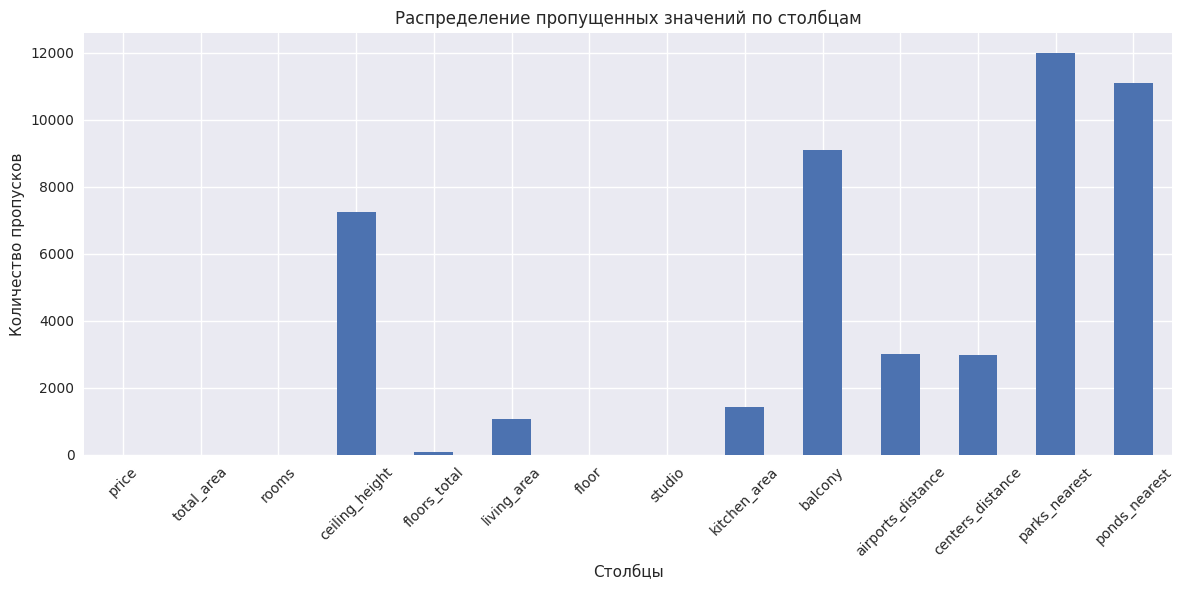

In [278]:
# Настраиваем внешний вид графиков
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму пропусков
missing_plot = df.isnull().sum()
missing_plot.plot(kind='bar')
plt.title('Распределение пропущенных значений по столбцам')
plt.ylabel('Количество пропусков')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Площадь кухни

### Заполним пропуски в столбце площадь кухни у студий нулями, так как у студий площадь кухни и правда равна нулю

In [279]:
studio_mask = (df["studio"] == 1) & (df["kitchen_area"].isnull())
df.loc[studio_mask, "kitchen_area"] = 0

## Балкон

### Если стоит Nan в балконе, то, как мне кажется, наиболее вероятно что балкона нет, следовательно заполняем нулями

In [280]:
df["balcony"] = df["balcony"].fillna(0)
df.head(10)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
8793,12190.0,109.0,2,2.75,25.0,32.0,25,False,40.5,0.0,36421.0,9176.0,805.0,NaN
17456,430000.0,30.4,1,NaN,2.0,16.0,1,False,6.0,0.0,NaN,NaN,NaN,NaN
5698,450000.0,42.0,2,NaN,1.0,23.0,1,False,5.8,0.0,NaN,NaN,NaN,NaN
9581,450000.0,43.4,2,NaN,5.0,30.3,3,False,5.5,0.0,NaN,NaN,NaN,NaN
17676,450000.0,36.5,1,NaN,5.0,17.3,4,False,8.5,1.0,NaN,NaN,NaN,NaN
16219,450000.0,38.5,2,2.65,2.0,NaN,1,False,NaN,0.0,NaN,NaN,NaN,NaN
23484,470000.0,44.5,2,NaN,2.0,28.0,2,False,7.5,0.0,NaN,NaN,NaN,NaN
16032,480000.0,32.0,1,NaN,2.0,16.0,1,False,NaN,0.0,NaN,NaN,NaN,NaN
10782,490000.0,29.1,1,2.50,5.0,17.0,5,False,5.5,0.0,NaN,NaN,NaN,NaN
14295,500000.0,34.0,1,NaN,5.0,17.0,4,False,8.0,1.0,NaN,NaN,NaN,NaN


## Высота потолков

### Посмотрим какие данные есть в столбце с высотой потолков, что бы понять как лучше заполнить пропуски

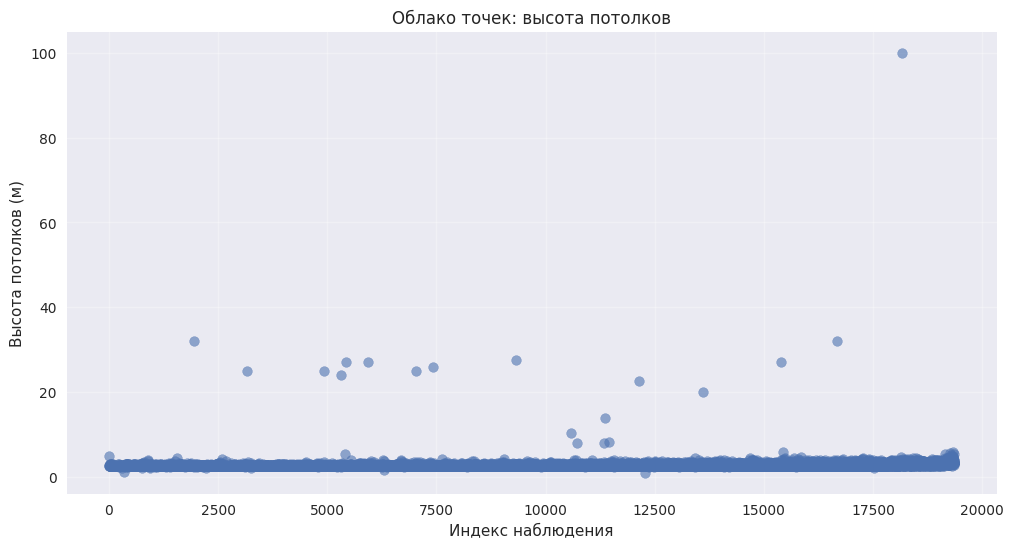

In [281]:
# Облако точек для высоты потолков
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['ceiling_height'], alpha=0.6)
plt.title('Облако точек: высота потолков')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Высота потолков (м)')
plt.grid(True, alpha=0.3)
plt.show()

### Так как в данных в основном стандартные квартиры, думаю можно потолки высотой больше 5 метров считать выбросами.
Проверим какой процент составляют эти квартиры с высоченными потолками

In [282]:
# Считаем процент записей с потолком выше 5 метров
high_ceilings = df['ceiling_height'] > 5
count_high = high_ceilings.sum()
total_count = len(df['ceiling_height'])
percentage = (count_high / total_count) * 100

print(f"Записей с потолком выше 5 метров: {count_high}")
print(f"Общее количество записей: {total_count}")
print(f"Процент: {percentage:.4f}%")

Записей с потолком выше 5 метров: 26
Общее количество записей: 19367
Процент: 0.1342%


### Как и ожидалось очень высокие потолки встречаются не так часто и можно их *выкинуть*

In [283]:
df = df[df['ceiling_height'] <= 5]

### Пропуски в высоте потолка можно заполнить медианой

In [284]:
# Создаем маску для пропусков в ceiling_height
mask = df['ceiling_height'].isnull()

# Заполняем пропуски медианой
df.loc[mask, 'ceiling_height'] = df['ceiling_height'].median()

<Figure size 1500x800 with 0 Axes>

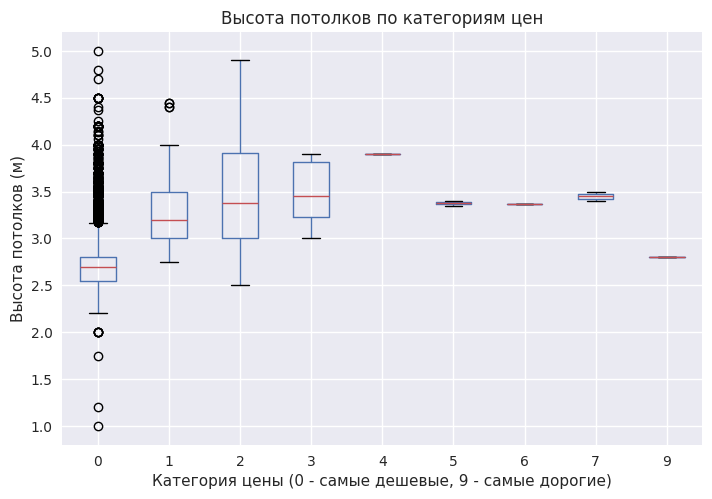

In [285]:
# Создаем копию чтобы избежать предупреждения
df_temp = df.copy()
df_temp['price_category'] = pd.cut(df_temp['price'], bins=10, labels=False)

# Строим boxplot
plt.figure(figsize=(15, 8))
df_temp.boxplot(column='ceiling_height', by='price_category', grid=True)
plt.title('Высота потолков по категориям цен')
plt.suptitle('')
plt.xlabel('Категория цены (0 - самые дешевые, 9 - самые дорогие)')
plt.ylabel('Высота потолков (м)')
plt.show()

### Выкинем строки где потолки ниже двух метров, вряд ли кто то хочет жить в подвале

In [286]:
df = df[df['ceiling_height'] >= 2]

<Figure size 1500x800 with 0 Axes>

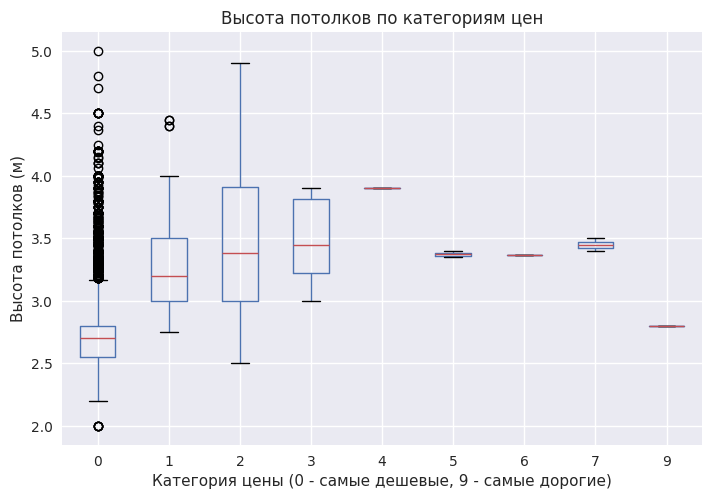

In [287]:
# Создаем копию чтобы избежать предупреждения
df_temp = df.copy()
df_temp['price_category'] = pd.cut(df_temp['price'], bins=10, labels=False)

# Строим boxplot
plt.figure(figsize=(15, 8))
df_temp.boxplot(column='ceiling_height', by='price_category', grid=True)
plt.title('Высота потолков по категориям цен')
plt.suptitle('')
plt.xlabel('Категория цены (0 - самые дешевые, 9 - самые дорогие)')
plt.ylabel('Высота потолков (м)')
plt.show()

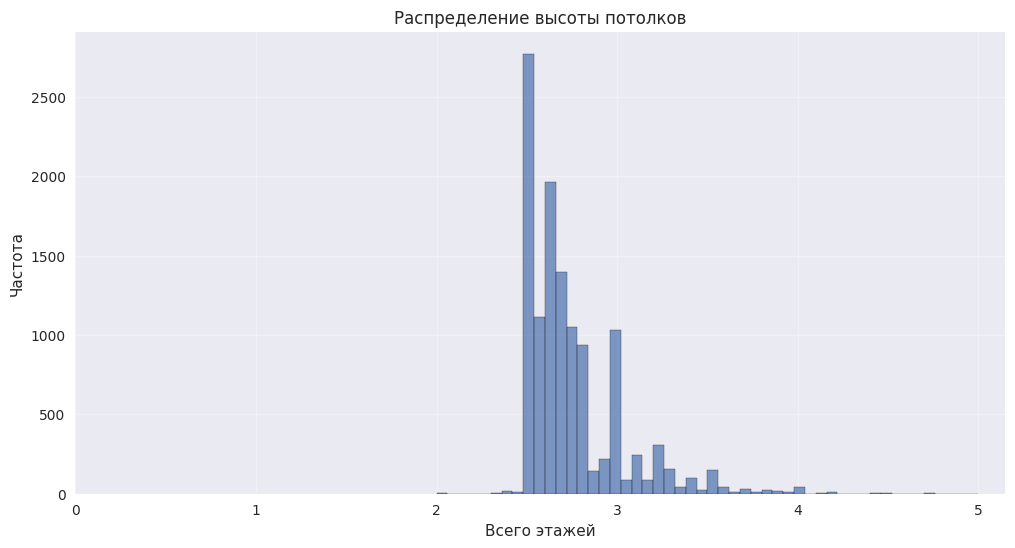

In [288]:
plt.figure(figsize=(12, 6))
plt.hist(df['ceiling_height'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение высоты потолков')
plt.xlabel('Всего этажей')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, int(df['ceiling_height'].max())+1, 1))
plt.show()

## Посмотрим данные по этажам в доме

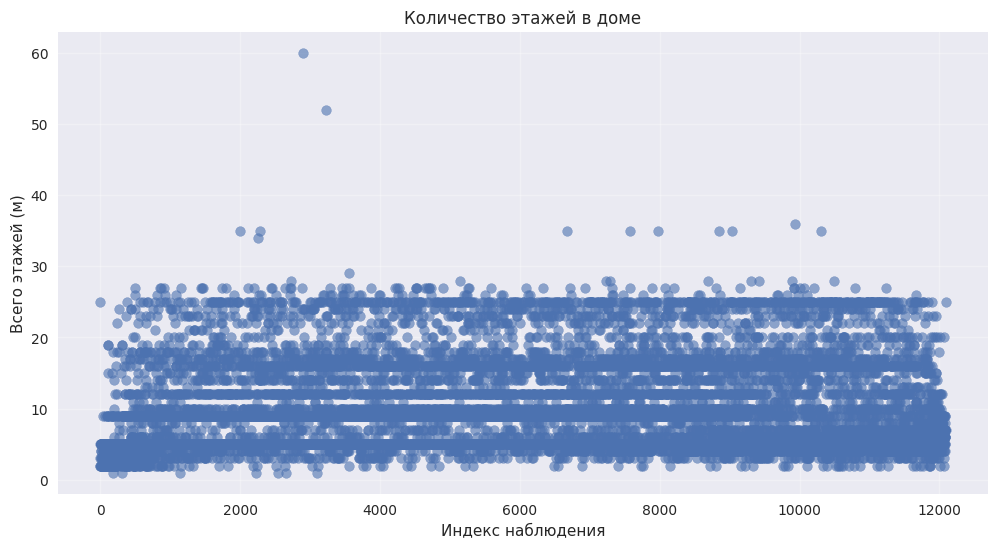

In [289]:
# Облако точек для количества этажей
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['floors_total'], alpha=0.6)
plt.title('Количество этажей в доме')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Всего этажей (м)')
plt.grid(True, alpha=0.3)
plt.show()

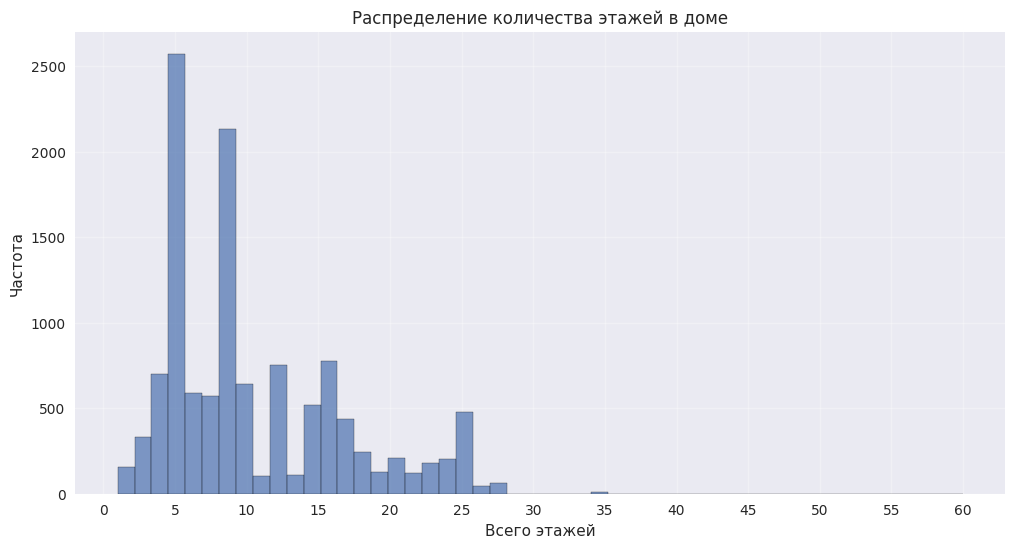

In [290]:
plt.figure(figsize=(12, 6))
plt.hist(df['floors_total'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение количества этажей в доме')
plt.xlabel('Всего этажей')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, int(df['floors_total'].max())+1, 5))
plt.show()

<Figure size 1500x800 with 0 Axes>

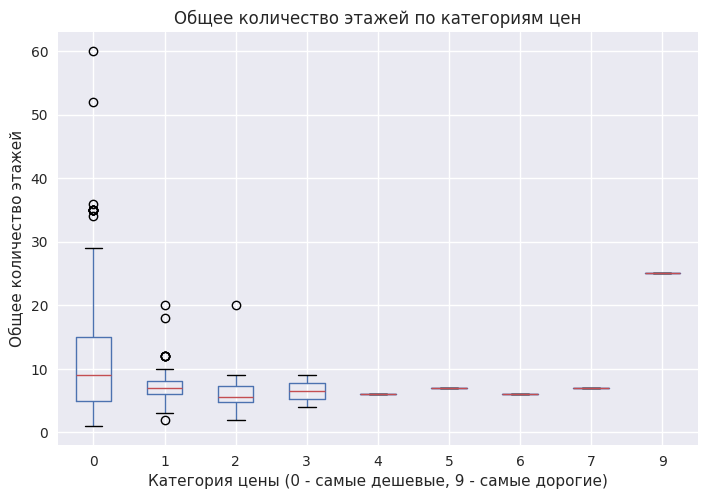

In [291]:
# Создаем копию чтобы избежать предупреждения
df_temp = df.copy()
df_temp['price_category'] = pd.cut(df_temp['price'], bins=10, labels=False)

# Строим boxplot для общего количества этажей
plt.figure(figsize=(15, 8))
df_temp.boxplot(column='floors_total', by='price_category', grid=True)
plt.title('Общее количество этажей по категориям цен')
plt.suptitle('')
plt.xlabel('Категория цены (0 - самые дешевые, 9 - самые дорогие)')
plt.ylabel('Общее количество этажей')
plt.show()

In [292]:
# Считаем процент записей с этажностью больше 25
high_floors = df['floors_total'] > 25
count_high = high_floors.sum()
total_count = len(df['floors_total'])
percentage = (count_high / total_count)

print(f"Записей с этажностью больше 25: {count_high}")
print(f"Общее количество записей: {total_count}")
print(f"Процент: {percentage:.4f}")

Записей с этажностью больше 25: 126
Общее количество записей: 12090
Процент: 0.0104


### данных по высокоэтажкам(>25 этажей) довольно мало поэтому их тоже можно выкинуть

In [293]:
# Удаляем строки с этажностью больше 25
df = df[df['floors_total'] <= 25]

### Пропуски в количестве этажей дома заполним медианой тк она устойчива к выбросам
тк как мы умные и поняли это сразу, а не искали где мы ошиблись пол дня, сразу проверим строки где заполненное медианой значение меньше чем значения этажа квартиры
дабы убрать противоречие приравняем этажность дома к этажу конкретной квартиры

**Проблема:** В некоторых записях номер этажа квартиры превышает общую этажность дома

**Решение:**
- Находим все записи где `floor` > `floors_total`
- В этих записях устанавливаем `floors_total` = `floor`

In [294]:
# Находим строки где floor > floors_total
invalid_floors = df[df['floor'] > df['floors_total']]
print(f"Количество записей с floor > floors_total: {len(invalid_floors)}")

# Исправляем: в этих строках делаем floors_total = floor
if len(invalid_floors) > 0:
    mask = df['floor'] > df['floors_total']
    df.loc[mask, 'floors_total'] = df.loc[mask, 'floor']
    print("Исправлено записей с несоответствием этажей")

Количество записей с floor > floors_total: 0


## Посмотрим на данные в колонке этаж

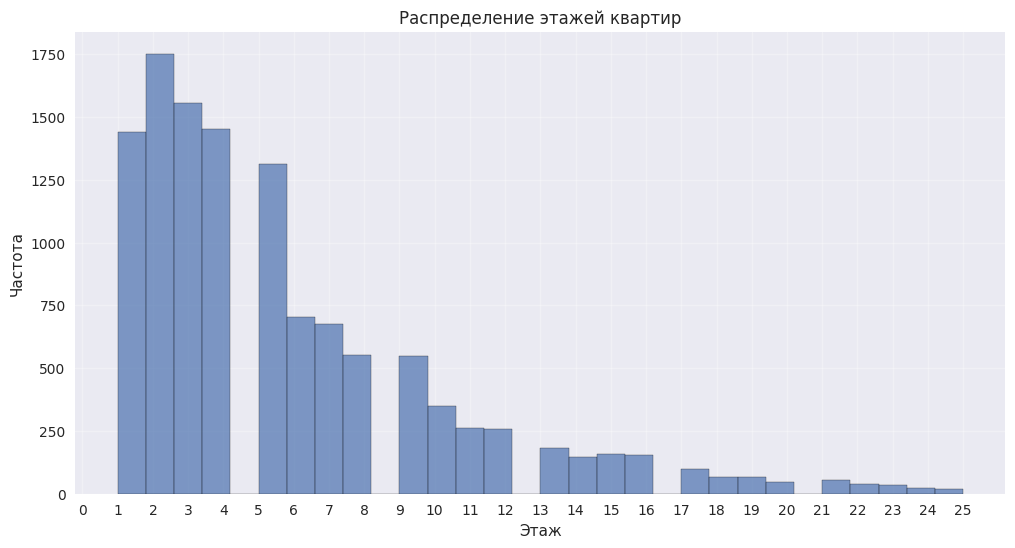

In [295]:
# Гистограмма для этажей квартир
plt.figure(figsize=(12, 6))
plt.hist(df['floor'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Распределение этажей квартир')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.xticks(range(0, int(df['floor'].max())+1))
plt.grid(True, alpha=0.3)
plt.show()

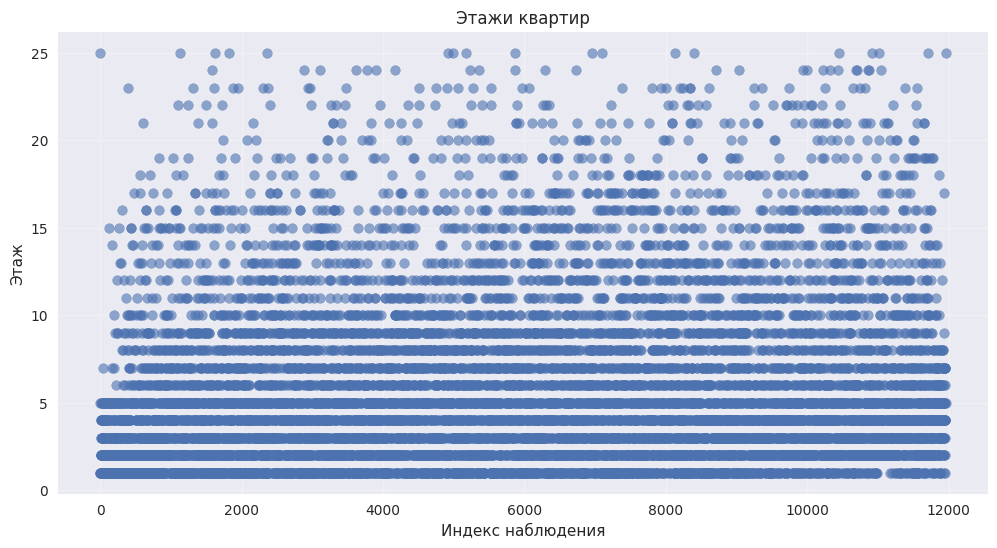

In [296]:
# Облако точек для этажей квартир
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['floor'], alpha=0.6)
plt.title('Этажи квартир')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Этаж')
plt.grid(True, alpha=0.3)
plt.show()

## Жилая площадь

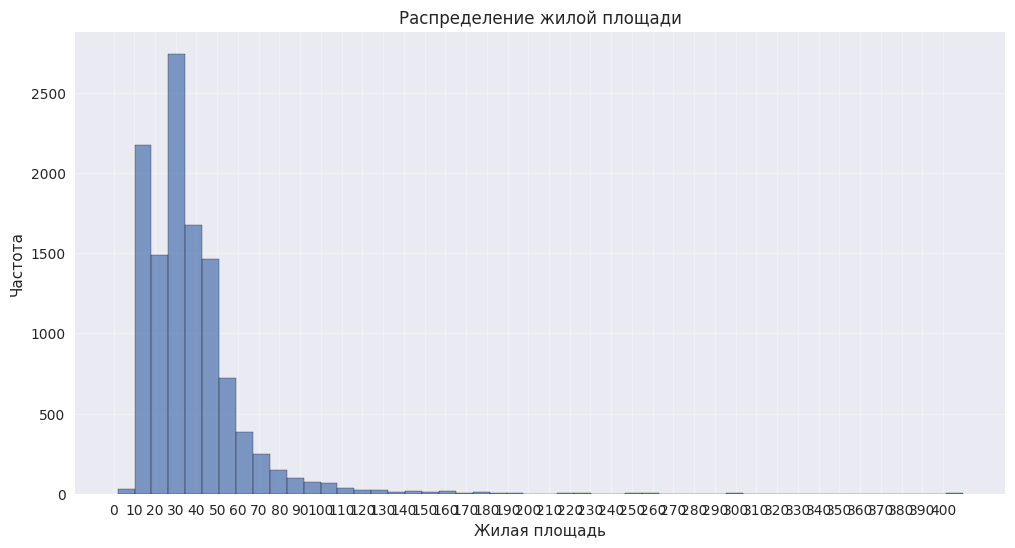

In [297]:
plt.figure(figsize=(12, 6))
plt.hist(df['living_area'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.xticks(range(0, int(df['living_area'].max())+1, 10))
plt.grid(True, alpha=0.3)
plt.show()

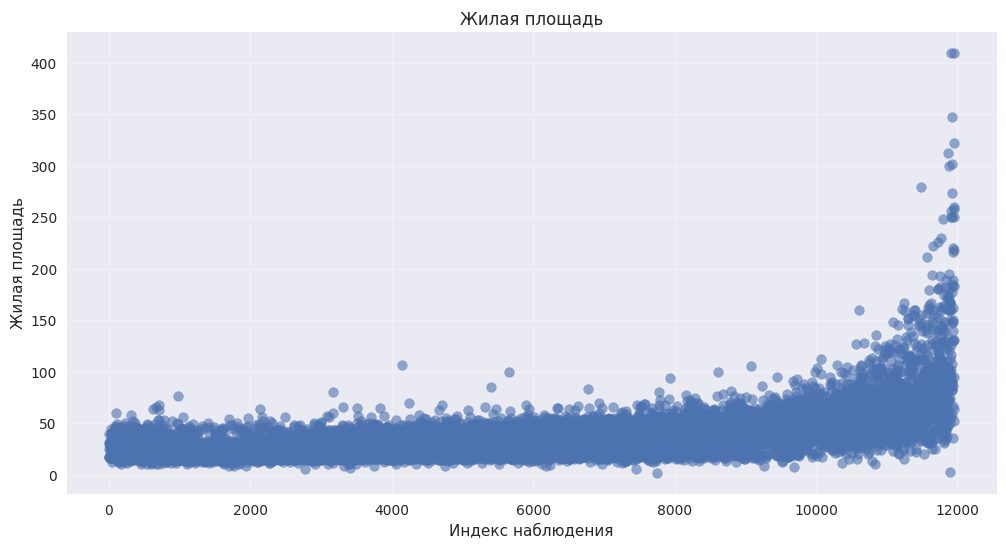

In [298]:
# Облако точек для жилой площади
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['living_area'], alpha=0.6)
plt.title('Жилая площадь')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Жилая площадь')
plt.grid(True, alpha=0.3)
plt.show()

In [299]:
# Подсчет количества малых значений жилой площади
n = 10
count_zeros = (df['living_area'] < n).sum()
print(f"Количество строк с living_area < {n}: {count_zeros}")

total_count = len(df['living_area'])
percentage = (count_zeros / total_count)
print(f"Количество строк с living_area < {n} (в процентах): {percentage}")

Количество строк с living_area < 10: 15
Количество строк с living_area < 10 (в процентах): 0.0012544952747344652


In [300]:
# Подсчет количества больших значений жилой площади
n = 140
count_zeros = (df['living_area'] > n).sum()
print(f"Количество строк с living_area > {n}: {count_zeros}")

total_count = len(df['living_area'])
percentage = (count_zeros / total_count)
print(f"Количество строк с living_area > {n} (в процентах): {percentage}")

Количество строк с living_area > 140: 96
Количество строк с living_area > 140 (в процентах): 0.008028769758300577


### Уберем строки содержащие выбросы

In [301]:
# Удаляем строки где living_area <= 10 И living_area >= 140
df = df[(df['living_area'] > 10) & (df['living_area'] < 140)]

In [302]:
df['living_area'].isna().sum()

np.int64(0)

## Посмотрим данные по общей площади

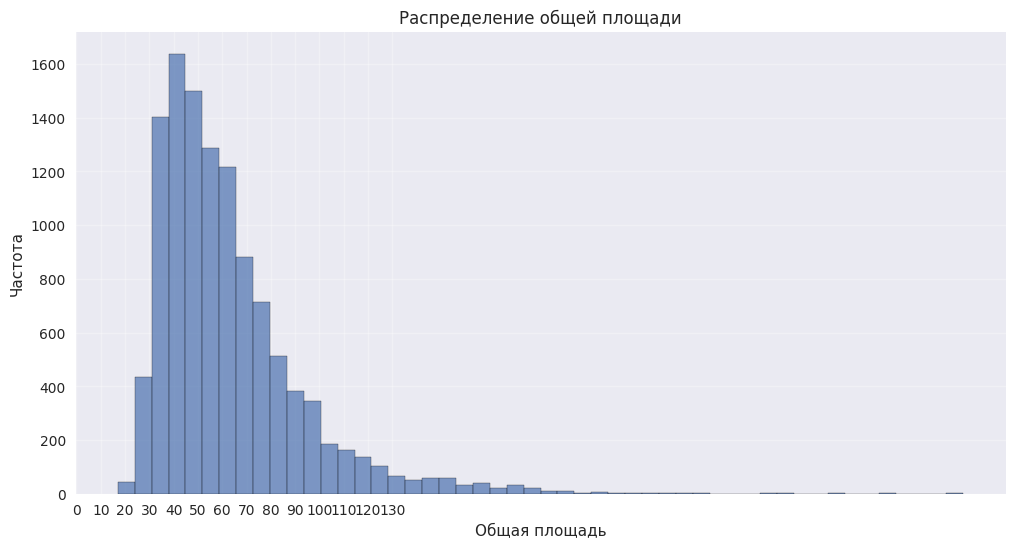

In [303]:
plt.figure(figsize=(12, 6))
plt.hist(df['total_area'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.xticks(range(0, int(df['living_area'].max())+1, 10))
plt.grid(True, alpha=0.3)
plt.show()

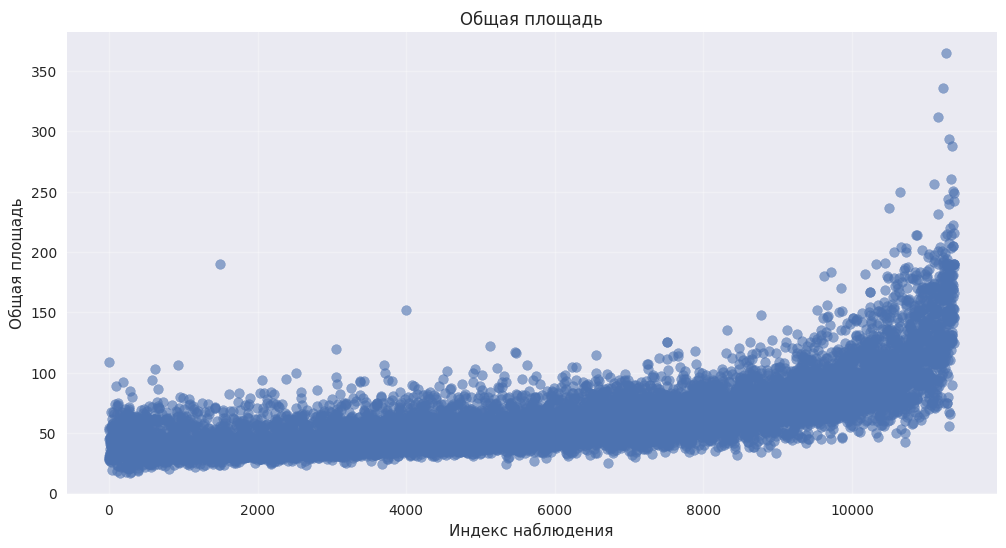

In [304]:
# Облако точек для жилой площади
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['total_area'], alpha=0.6)
plt.title('Общая площадь')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Общая площадь')
plt.grid(True, alpha=0.3)
plt.show()

In [305]:
# Подсчет количества малых значений общей площади
n = 25
count_zeros = (df['total_area'] < n).sum()
print(f"Количество строк с living_area < {n}: {count_zeros}")

total_count = len(df['total_area'])
percentage = (count_zeros / total_count)
print(f"Количество строк с total_area < {n} (в процентах): {percentage}")

Количество строк с living_area < 25: 57
Количество строк с total_area < 25 (в процентах): 0.005009227524387028


In [306]:
# Подсчет количества нулевых значений
n = 160
count_zeros = (df['total_area'] > n).sum()
print(f"Количество строк с living_area > {n}: {count_zeros}")

total_count = len(df['total_area'])
percentage = (count_zeros / total_count)
print(f"Количество строк с total_area > {n} (в процентах): {percentage}")

Количество строк с living_area > 160: 176
Количество строк с total_area > 160 (в процентах): 0.015467088496352931


### Уберем выбросы

In [307]:
# Удаляем строки где total_area <= 25 И total_area >= 160
df = df[(df['total_area'] > 25) & (df['total_area'] < 160)]

## Площадь кухни

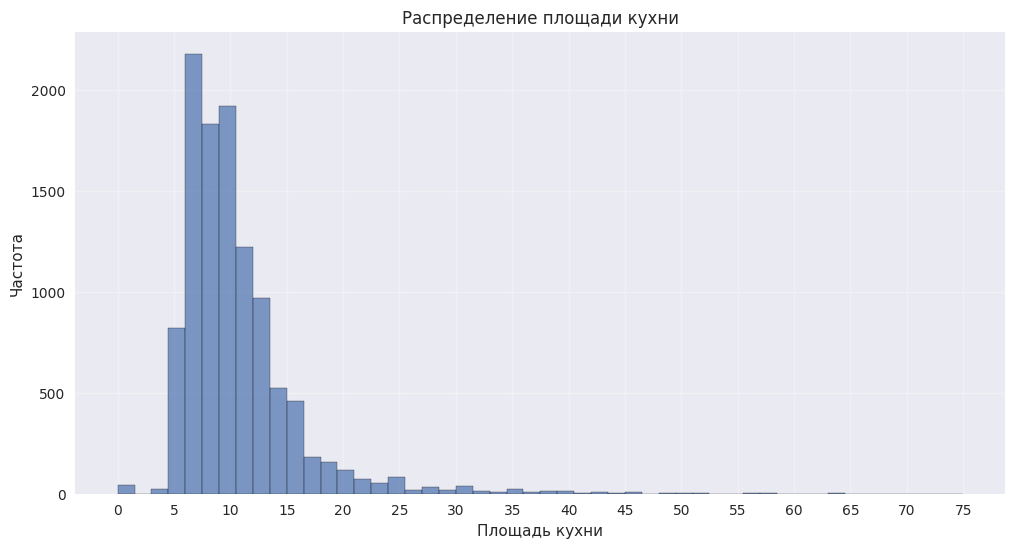

In [308]:
# Гистограмма для площади кухни
plt.figure(figsize=(12, 6))
plt.hist(df['kitchen_area'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.xticks(range(0, int(df['kitchen_area'].max())+1, 5))
plt.grid(True, alpha=0.3)
plt.show()

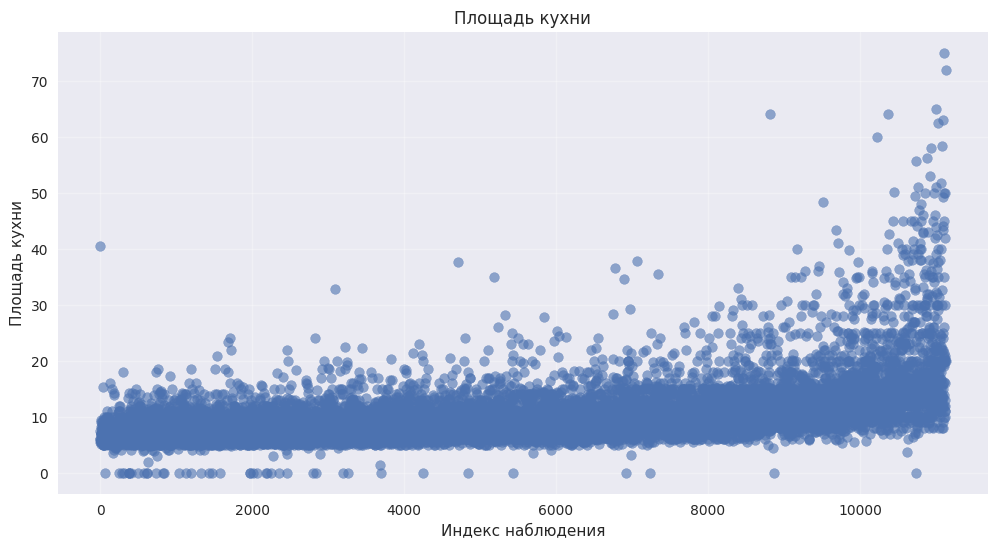

In [309]:
# Облако точек для площади кухни
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['kitchen_area'], alpha=0.6)
plt.title('Площадь кухни')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Площадь кухни')
plt.grid(True, alpha=0.3)
plt.show()

In [310]:
# Подсчет количества где площадь кухни = 0
n = 0
count_small = (df['kitchen_area'] == n).sum()
print(f"Количество строк с kitchen_area = {n}: {count_small}")

total_count = len(df['kitchen_area'])
percentage = (count_small / total_count)
print(f"Доля строк с kitchen_area = {n}: {percentage}")

Количество строк с kitchen_area = 0: 43
Доля строк с kitchen_area = 0: 0.003863779315302363


### Проверим это все студии?

In [311]:
# Подсчет количества где площадь кухни = 0
n = 0
count_small = (df['kitchen_area'] == n).sum()
print(f"Количество строк с kitchen_area = {n}: {count_small}")

total_count = len(df['kitchen_area'])
percentage = (count_small / total_count)
print(f"Доля строк с kitchen_area = {n}: {percentage}")

# Проверка что у них всех studio = true
zero_kitchen_df = df[df['kitchen_area'] == n]
studio_check = zero_kitchen_df['studio'].value_counts()

print("\nПроверка студий для строк с kitchen_area = 0:")
print(studio_check)

Количество строк с kitchen_area = 0: 43
Доля строк с kitchen_area = 0: 0.003863779315302363

Проверка студий для строк с kitchen_area = 0:
studio
True    43
Name: count, dtype: int64


In [312]:
studio_df = df[df['studio'] == True]
studios_non_zero = studio_df[studio_df['kitchen_area'] != 0]
print(f"\nНайдено {len(studios_non_zero)} студий с kitchen_area ≠ 0:")


Найдено 0 студий с kitchen_area ≠ 0:


In [313]:
# Подсчет количества больших значений площади кухни
n = 40
count_large = (df['kitchen_area'] > n).sum()
print(f"Количество строк с kitchen_area > {n}: {count_large}")

total_count = len(df['kitchen_area'])
percentage = (count_large / total_count)
print(f"Доля строк с kitchen_area > {n}: {percentage:}")

Количество строк с kitchen_area > 40: 52
Доля строк с kitchen_area > 40: 0.004672477311528439


### Заполним пропуски в площади кухни как total_area - living_area, но только для обычных квартир, не студий

In [314]:
# Заполняем пропуски в kitchen_area только для нестудий
mask = df['kitchen_area'].isna() & (df['studio'] == False)
df.loc[mask, 'kitchen_area'] = df.loc[mask, 'total_area'] - df.loc[mask, 'living_area']

## Количество комнат

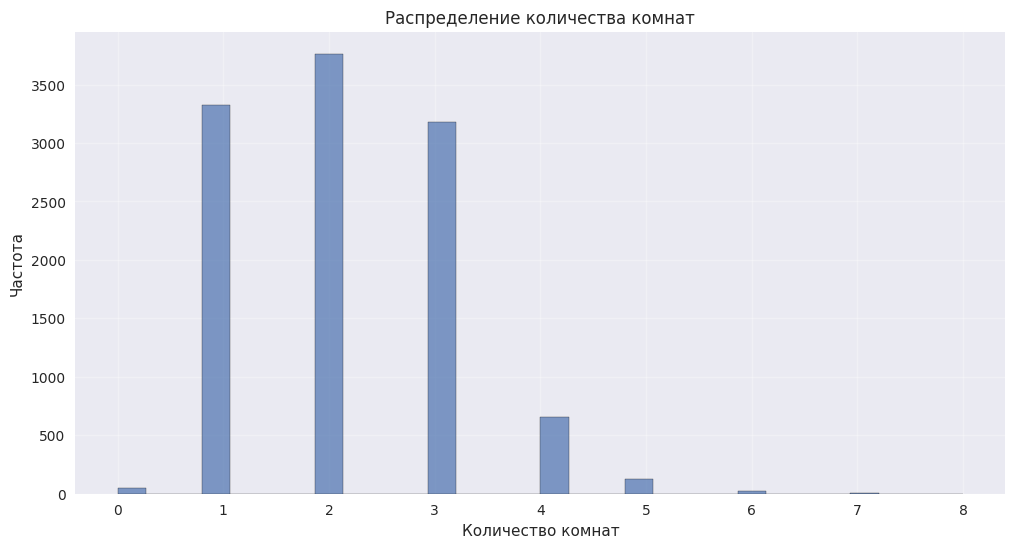

In [315]:
# Гистограмма для количества комнат
plt.figure(figsize=(12, 6))
plt.hist(df['rooms'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.xticks(range(0, int(df['rooms'].max())+1))
plt.grid(True, alpha=0.3)
plt.show()

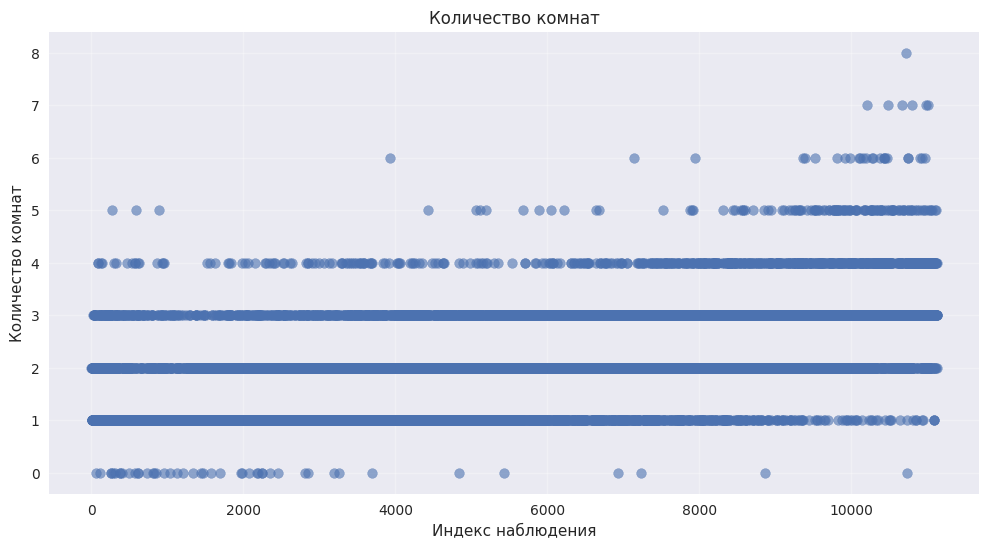

In [316]:
# Облако точек для количества комнат
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df)), df['rooms'], alpha=0.6)
plt.title('Количество комнат')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Количество комнат')
plt.grid(True, alpha=0.3)
plt.show()

### Проверим все ли квартиры с rooms = 0 являются студиями

In [317]:
# Проверка что у всех квартир с количеством комнат равных 0 стоит studio true
zero_rooms_df = df[df['rooms'] == 0]
zero_rooms_count = len(zero_rooms_df)

if zero_rooms_count > 0:
    studio_check = (zero_rooms_df['studio'] == True).sum()
    print(f"Количество квартир с rooms = 0: {zero_rooms_count}")
    print(f"Из них studio = True: {studio_check}")
    print(f"Все ли квартиры с rooms = 0 являются студиями: {studio_check == zero_rooms_count}")

    if studio_check != zero_rooms_count:
        non_studio_zero_rooms = zero_rooms_df[zero_rooms_df['studio'] == False]
        print(f"\nНайдено {len(non_studio_zero_rooms)} квартир с rooms = 0, но studio = False:")
        print(non_studio_zero_rooms[['rooms', 'studio', 'total_area', 'living_area','kitchen_area']].head(10))
else:
    print("Квартир с rooms = 0 не найдено")

Количество квартир с rooms = 0: 46
Из них studio = True: 40
Все ли квартиры с rooms = 0 являются студиями: False

Найдено 6 квартир с rooms = 0, но studio = False:
       rooms  studio  total_area  living_area  kitchen_area
11331      0   False       27.32         18.7          8.62
839        0   False       35.00         15.0         20.00
19735      0   False       30.50         20.0         10.50
11157      0   False       27.30         20.0          7.30
11705      0   False       26.00         17.0          9.00
6472       0   False       28.00         18.0         10.00


### Скорее всего это однокомнатные квартиры тк у них есть отдельная кухня. Поменяем rooms на 1

In [318]:
# Меняем rooms с 0 на 1 для найденных записей
mask = (df['rooms'] == 0) & (df['studio'] == False)
count_to_fix = mask.sum()
print(f"Исправлено записей: {count_to_fix}")
df.loc[mask, 'rooms'] = 1

Исправлено записей: 6


## Посмотрим признак студия

In [319]:
studio_samples = df[df['studio'] == True]
studio_samples[['rooms', 'studio', 'total_area', 'living_area','kitchen_area']].head(25)

,rooms,studio,total_area,living_area,kitchen_area
6220,0,True,32.00,20.00,0.0
22053,0,True,30.10,21.00,0.0
17449,0,True,28.20,22.90,0.0
2475,0,True,27.00,17.00,0.0
12935,1,True,31.00,22.30,0.0
16093,0,True,25.70,17.80,0.0
15361,0,True,27.40,18.60,0.0
10729,0,True,28.00,17.40,0.0
22200,0,True,27.70,19.60,0.0
1600,0,True,30.00,15.90,0.0


In [320]:
studio_samples[['rooms', 'studio', 'total_area', 'living_area','kitchen_area']].describe()

,rooms,total_area,living_area,kitchen_area
count,43.000000,43.000000,43.000000,43.0
mean,0.069767,31.922093,21.301163,0.0
std,0.257770,11.989755,7.402949,0.0
min,0.000000,25.700000,15.000000,0.0
25%,0.000000,27.150000,17.825000,0.0
50%,0.000000,28.000000,19.600000,0.0
75%,0.000000,32.000000,22.600000,0.0
max,1.000000,98.400000,60.500000,0.0


### Везде где студия ставим количество комнат 0

In [321]:
mask = df['studio'] == True
df.loc[mask, 'rooms'] = 0

## Проверим некоторые соотношения на логику

### kitchen_area + living_area <= total_area

In [322]:
# Проверяем условие: kitchen_area + living_area <= total_area
invalid_area = df[(df['kitchen_area'] + df['living_area']) > df['total_area']]
print(f"Количество записей с неверной площадью: {len(invalid_area)}")

# Показываем примеры проблемных записей
if len(invalid_area) > 0:
    print("\nПримеры проблемных записей:")
    display(invalid_area[['total_area', 'living_area', 'kitchen_area']].head(10))

Количество записей с неверной площадью: 36

Примеры проблемных записей:


,total_area,living_area,kitchen_area
20034,46.00,37.00,11.00
7680,38.80,33.00,6.00
9333,41.90,33.30,14.10
184,30.20,26.10,6.20
21868,34.30,30.60,8.00
3891,70.40,68.10,9.00
10725,25.60,14.17,14.17
10913,43.30,40.70,12.30
551,31.59,30.55,9.28
20490,41.00,35.10,10.30


In [323]:
# Исправляем записи с неверной площадью
if len(invalid_area) > 0:
    mask = (df['kitchen_area'] + df['living_area']) > df['total_area']
    df.loc[mask, 'living_area'] = df.loc[mask, 'total_area'] - df.loc[mask, 'kitchen_area']
    print(f"Исправлено записей: {len(invalid_area)}")

Исправлено записей: 36


In [324]:
df.head(10)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
8793,12190.0,109.0,2,2.75,25.0,32.0,25,False,40.5,0.0,36421.0,9176.0,805.0,NaN
10782,490000.0,29.1,1,2.50,5.0,17.0,5,False,5.5,0.0,NaN,NaN,NaN,NaN
11351,550000.0,54.0,2,3.00,2.0,40.0,1,False,7.5,0.0,NaN,NaN,NaN,NaN
1358,550000.0,27.6,1,2.50,5.0,17.0,2,False,6.0,0.0,NaN,NaN,NaN,NaN
19460,560000.0,52.0,2,3.00,3.0,30.0,3,False,6.0,0.0,NaN,NaN,NaN,NaN
22997,560000.0,28.5,1,2.60,4.0,17.2,4,False,5.7,1.0,NaN,NaN,NaN,NaN
13809,565000.0,45.0,2,2.60,3.0,25.0,1,False,9.0,2.0,NaN,NaN,NaN,NaN
22952,600000.0,31.2,1,2.80,2.0,17.6,2,False,7.0,0.0,NaN,NaN,NaN,NaN
11211,600000.0,45.1,2,2.50,5.0,27.9,4,False,5.4,1.0,NaN,NaN,NaN,NaN
15548,630000.0,30.0,1,2.55,5.0,16.0,3,False,5.5,0.0,NaN,NaN,NaN,NaN


## Далее остались только признаки отвечающие за расположение
### Посмотрим на них

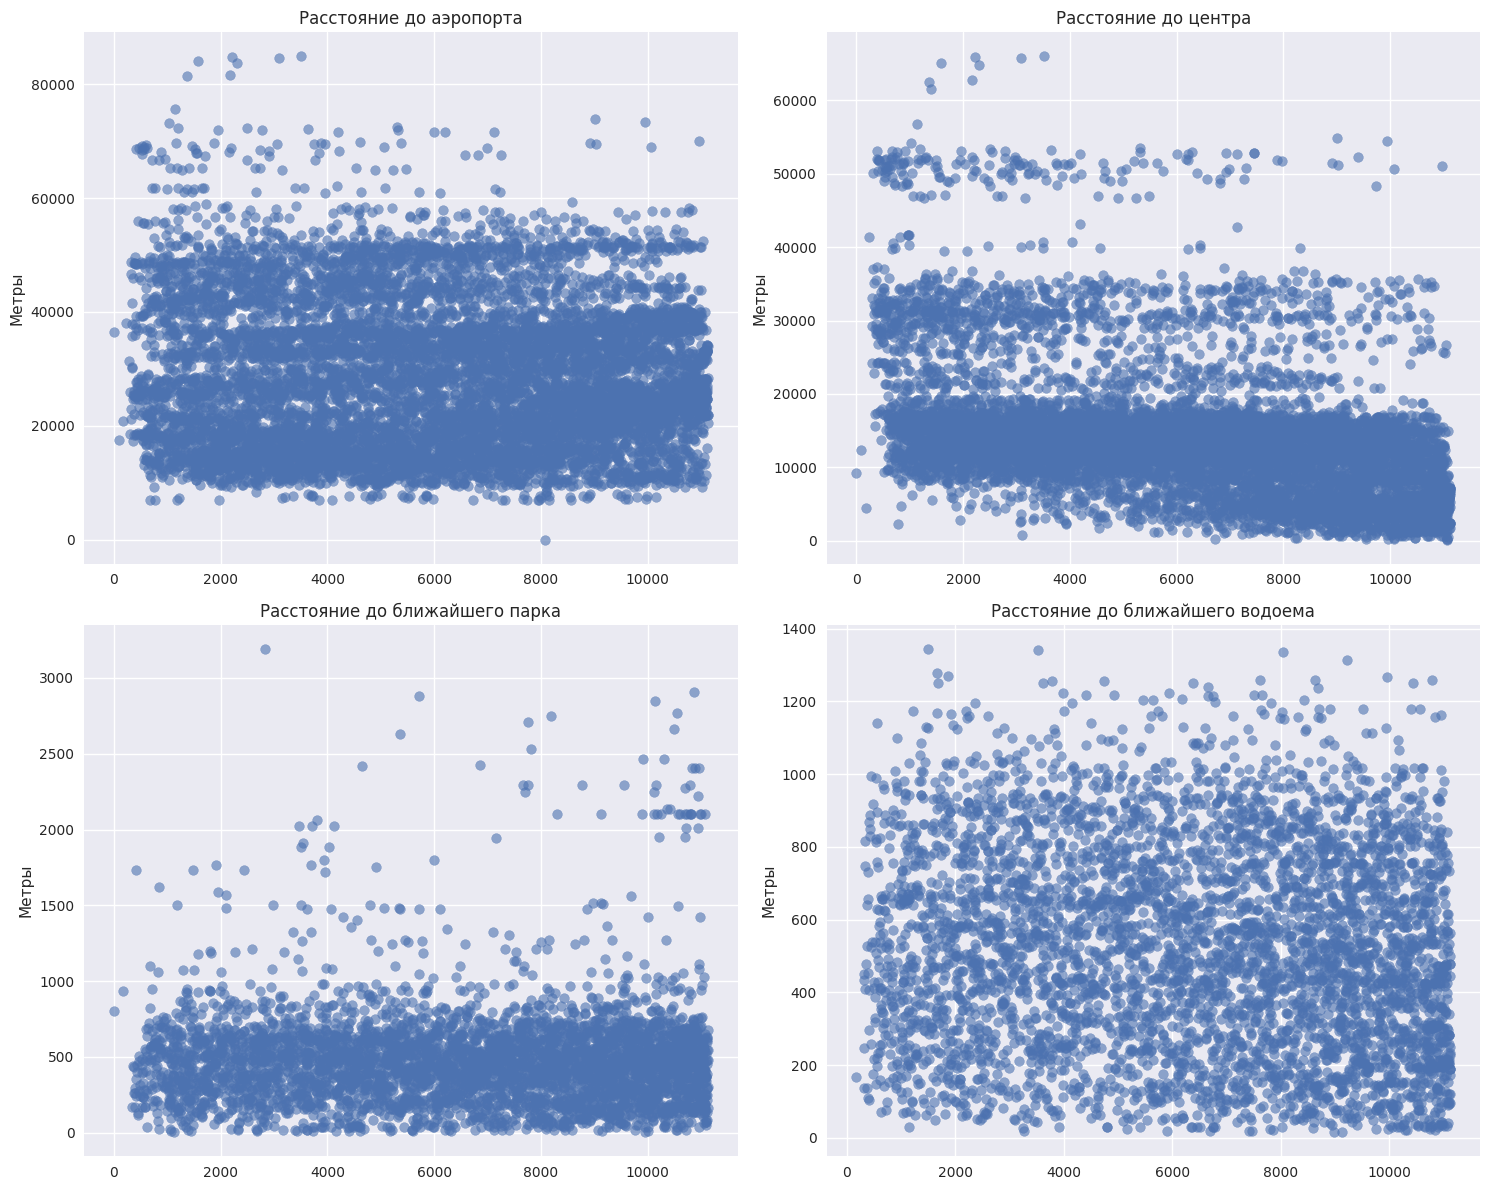

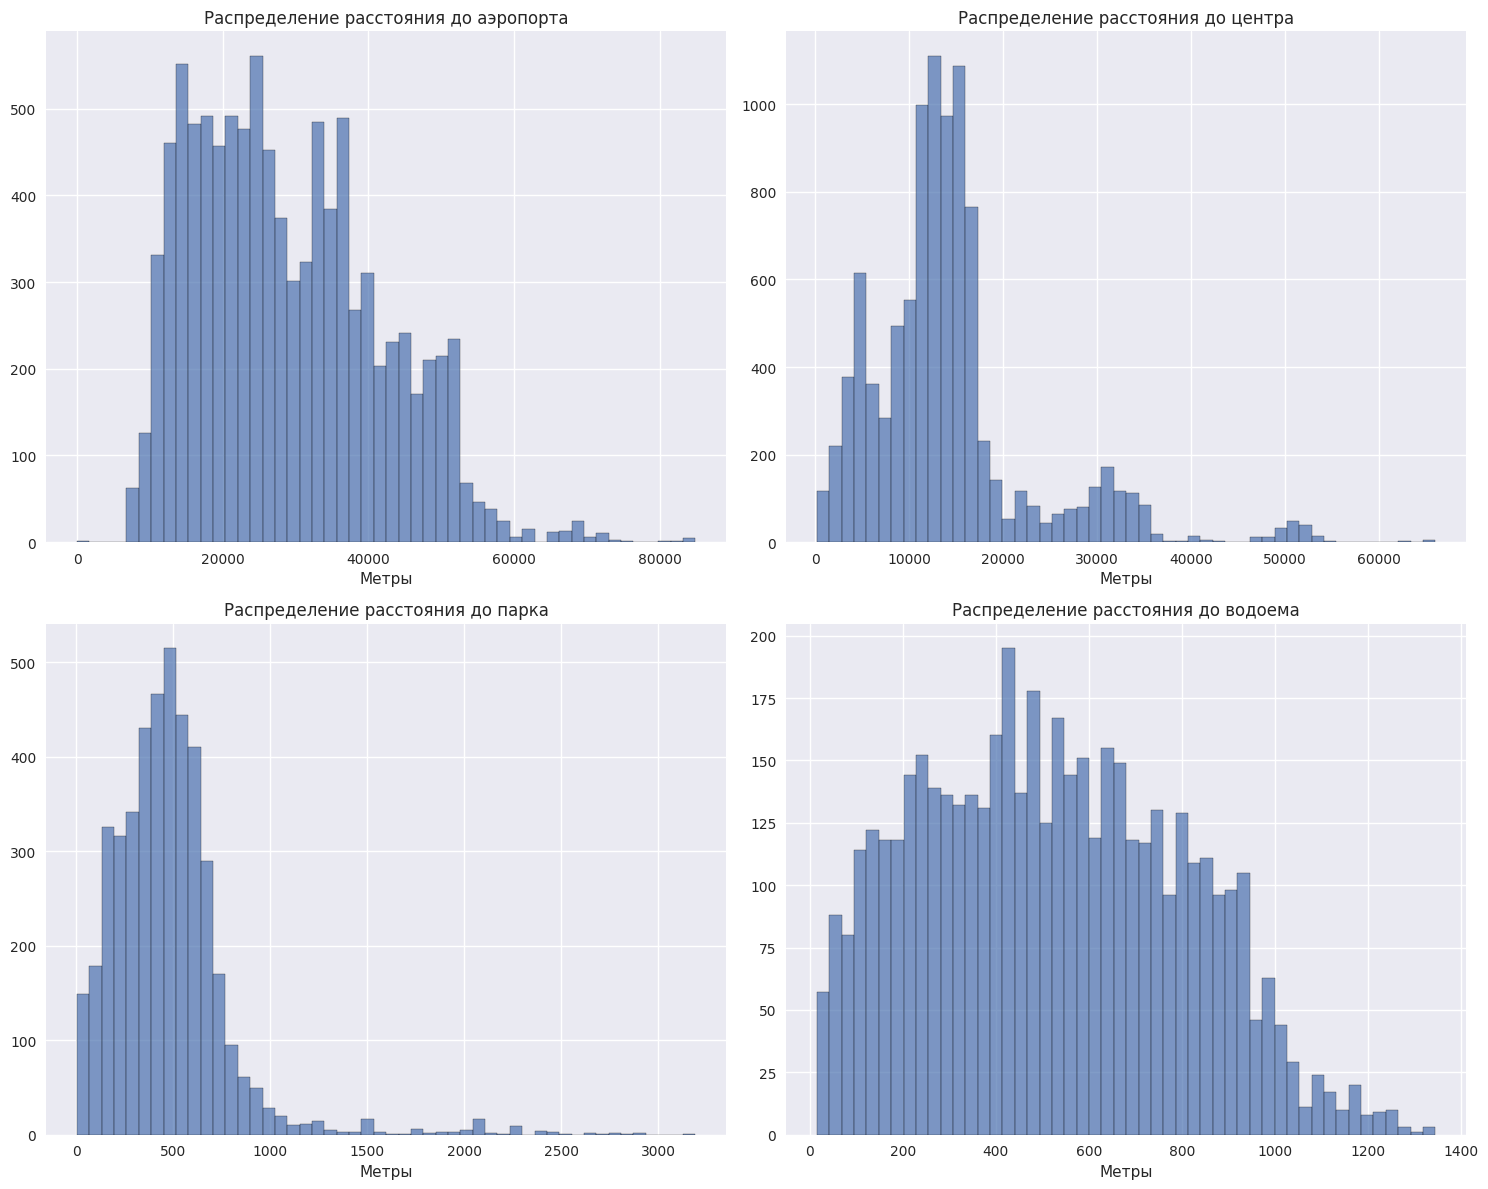

In [325]:
# Облака точек
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].scatter(range(len(df)), df['airports_distance'], alpha=0.6)
axes[0,0].set_title('Расстояние до аэропорта')
axes[0,0].set_ylabel('Метры')

axes[0,1].scatter(range(len(df)), df['centers_distance'], alpha=0.6)
axes[0,1].set_title('Расстояние до центра')
axes[0,1].set_ylabel('Метры')

axes[1,0].scatter(range(len(df)), df['parks_nearest'], alpha=0.6)
axes[1,0].set_title('Расстояние до ближайшего парка')
axes[1,0].set_ylabel('Метры')

axes[1,1].scatter(range(len(df)), df['ponds_nearest'], alpha=0.6)
axes[1,1].set_title('Расстояние до ближайшего водоема')
axes[1,1].set_ylabel('Метры')

plt.tight_layout()
plt.show()

# Распределения
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].hist(df['airports_distance'], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Распределение расстояния до аэропорта')
axes[0,0].set_xlabel('Метры')

axes[0,1].hist(df['centers_distance'], bins=50, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Распределение расстояния до центра')
axes[0,1].set_xlabel('Метры')

axes[1,0].hist(df['parks_nearest'], bins=50, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Распределение расстояния до парка')
axes[1,0].set_xlabel('Метры')

axes[1,1].hist(df['ponds_nearest'], bins=50, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Распределение расстояния до водоема')
axes[1,1].set_xlabel('Метры')

plt.tight_layout()
plt.show()

### Категоризация расстояния до аэропорта

Создадим категориальный признак `airports_category` на основе расстояния до аэропорта:

- **close** - менее 20,000 метров
- **medium** - от 20,000 до 40,000 метров  
- **far** - от 40,000 до 60,000 метров
- **no_airport** - более 60,000 метров или пропущенные значения

In [326]:
# Создаем категориальный признак для расстояния до аэропорта
conditions = [
    df['airports_distance'] < 20000,
    (df['airports_distance'] >= 20000) & (df['airports_distance'] < 40000),
    (df['airports_distance'] >= 40000) & (df['airports_distance'] < 60000),
    (df['airports_distance'] >= 60000) | df['airports_distance'].isna()
]

categories = ['close', 'medium', 'far', 'no_airport']

df['airports_category'] = np.select(conditions, categories, default='no_airport')

### Label Encoding для категорий аэропорта

Применим Label Encoding к категориальному признаку `airports_category`:

- **close** → 0
- **medium** → 1  
- **far** → 2
- **no_airport** → 3

In [327]:
# Создаем категориальный признак
df['airports_category'] = np.select(conditions, categories, default='no_airport')

# Применяем Label Encoding
label_encoder = LabelEncoder()
df['airports_category_encoded'] = label_encoder.fit_transform(df['airports_category'])

df.drop('airports_distance', axis=1, inplace=True)
df.drop('airports_category', axis=1, inplace=True)

### Так же поступим с расстоянием до центра
## я думаю что тут имеется ввиду центр как некоторая историческая часть города (область) и расстояние соответственно до нее

### Категоризация расстояния до центра

Создан категориальный признак `centers_category` на основе расстояния до центра:

- **center** - расстояние равно 0 (в центре)
- **very_close** - от 1 до 3,000 метров
- **close** - от 3,000 до 10,000 метров
- **medium** - от 10,000 до 25,000 метров
- **far** - от 25,000 до 40,000 метров
- **no_center** - более 40,000 метров или пропущенные значения

Применен Label Encoding для преобразования в числовые значения.

In [328]:
# Создаем категориальный признак для расстояния до центра
conditions = [
    df['centers_distance'] == 0,
    (df['centers_distance'] > 0) & (df['centers_distance'] < 3000),
    (df['centers_distance'] >= 3000) & (df['centers_distance'] < 10000),
    (df['centers_distance'] >= 10000) & (df['centers_distance'] < 25000),
    (df['centers_distance'] >= 25000) & (df['centers_distance'] < 40000),
    (df['centers_distance'] >= 40000) | df['centers_distance'].isna()
]

categories = ['center', 'very_close', 'close', 'medium', 'far', 'no_center']

df['centers_category'] = np.select(conditions, categories, default='no_center')

# Применяем Label Encoding
df['centers_category_encoded'] = label_encoder.fit_transform(df['centers_category'])

# Удаляем исходный столбец
df.drop('centers_distance', axis=1, inplace=True)
df.drop('centers_category', axis=1, inplace=True)

## Так же поступаем с парками и водоемами
### Категоризируем расстояния до парков и водоемов

#### Для парков (parks_nearest):
- **very_close_park** - до 250 метров
- **close_park** - от 250 до 500 метров
- **medium_park** - от 500 до 1000 метров
- **far_park** - от 1000 до 2000 метров
- **no_park** - более 2000 метров или пропущенные значения

#### Для водоемов (ponds_nearest):
- **very_close_pond** - до 250 метров
- **close_pond** - от 250 до 600 метров
- **medium_pond** - от 600 до 1000 метров
- **far_pond** - от 1000 до 1400 метров
- **no_pond** - более 1400 метров или пропущенные значения

Применяем Label Encoding и удаляем исходные категориальные столбцы.

In [329]:
# Для parks_nearest
conditions_parks = [
    df['parks_nearest'] <= 250,
    (df['parks_nearest'] > 250) & (df['parks_nearest'] <= 500),
    (df['parks_nearest'] > 500) & (df['parks_nearest'] <= 1000),
    (df['parks_nearest'] > 1000) & (df['parks_nearest'] <= 2000),
    (df['parks_nearest'] > 2000) | df['parks_nearest'].isna()
]

categories_parks = ['very_close_park', 'close_park', 'medium_park', 'far_park', 'no_park']

df['parks_category'] = np.select(conditions_parks, categories_parks, default='no_park')
df['parks_category_encoded'] = label_encoder.fit_transform(df['parks_category'])
df.drop(['parks_nearest', 'parks_category'], axis=1, inplace=True)

# Для ponds_nearest
conditions_ponds = [
    df['ponds_nearest'] <= 250,
    (df['ponds_nearest'] > 250) & (df['ponds_nearest'] <= 600),
    (df['ponds_nearest'] > 600) & (df['ponds_nearest'] <= 1000),
    (df['ponds_nearest'] > 1000) & (df['ponds_nearest'] <= 1400),
    (df['ponds_nearest'] > 1400) | df['ponds_nearest'].isna()
]

categories_ponds = ['very_close_pond', 'close_pond', 'medium_pond', 'far_pond', 'no_pond']

df['ponds_category'] = np.select(conditions_ponds, categories_ponds, default='no_pond')
df['ponds_category_encoded'] = label_encoder.fit_transform(df['ponds_category'])
df.drop(['ponds_nearest', 'ponds_category'], axis=1, inplace=True)

In [330]:
df.head(10)

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_category_encoded,centers_category_encoded,parks_category_encoded,ponds_category_encoded
8793,12190.0,109.0,2,2.75,25.0,32.0,25,False,40.5,0.0,2,0,2,3
10782,490000.0,29.1,1,2.50,5.0,17.0,5,False,5.5,0.0,3,3,3,3
11351,550000.0,54.0,2,3.00,2.0,40.0,1,False,7.5,0.0,3,3,3,3
1358,550000.0,27.6,1,2.50,5.0,17.0,2,False,6.0,0.0,3,3,3,3
19460,560000.0,52.0,2,3.00,3.0,30.0,3,False,6.0,0.0,3,3,3,3
22997,560000.0,28.5,1,2.60,4.0,17.2,4,False,5.7,1.0,3,3,3,3
13809,565000.0,45.0,2,2.60,3.0,25.0,1,False,9.0,2.0,3,3,3,3
22952,600000.0,31.2,1,2.80,2.0,17.6,2,False,7.0,0.0,3,3,3,3
11211,600000.0,45.1,2,2.50,5.0,27.9,4,False,5.4,1.0,3,3,3,3
15548,630000.0,30.0,1,2.55,5.0,16.0,3,False,5.5,0.0,3,3,3,3


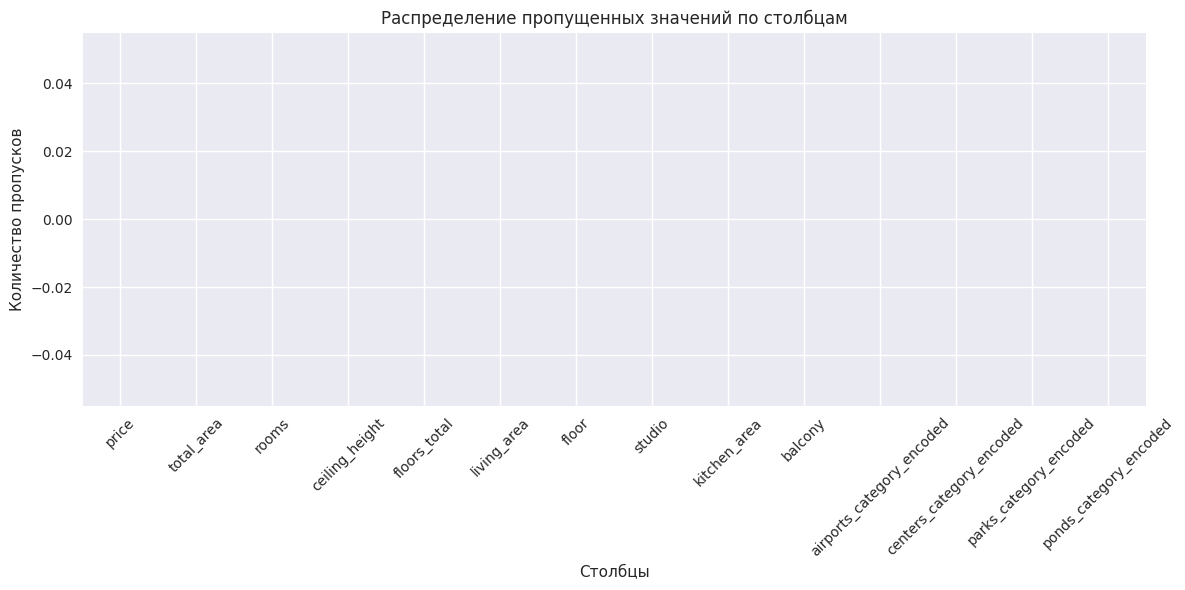

In [331]:
# Настраиваем внешний вид графиков
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму пропусков
missing_plot = df.isnull().sum()
missing_plot.plot(kind='bar')
plt.title('Распределение пропущенных значений по столбцам')
plt.ylabel('Количество пропусков')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [332]:
df_clean = df.copy()

## Вроде все почистили

## Посмотрим на корреляции признаков

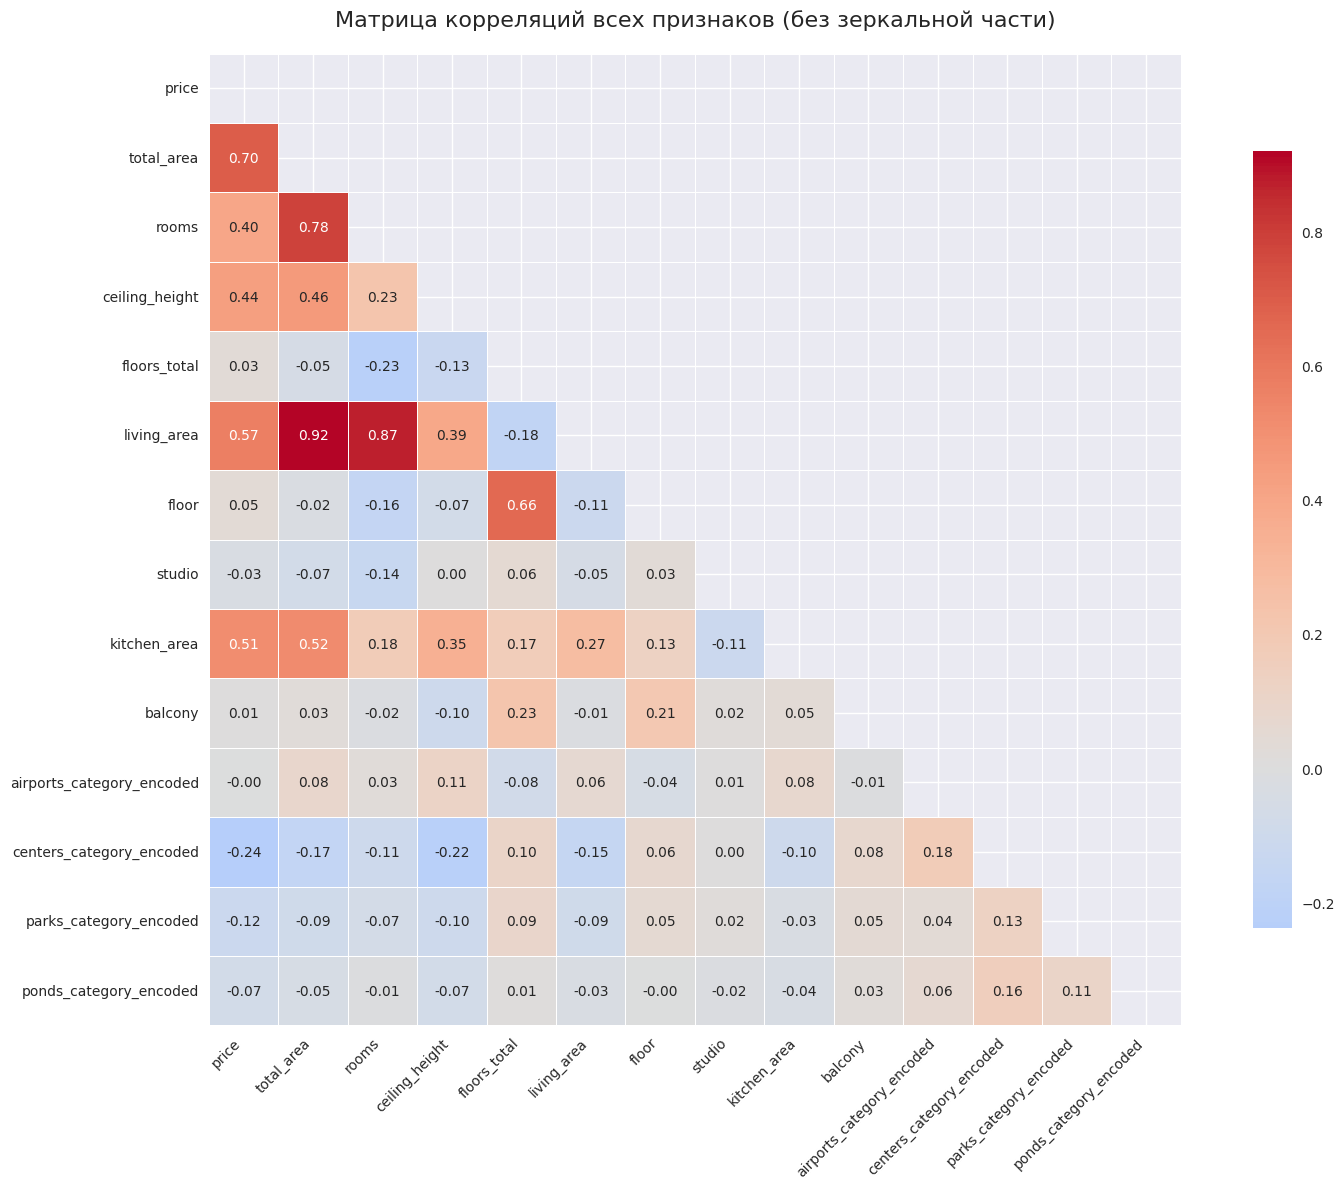

In [333]:
# Создаем матрицу корреляций
correlation_matrix = df_clean.corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Строим heatmap без зеркальной части
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            mask=mask)

plt.title('Матрица корреляций всех признаков (без зеркальной части)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Создадим новые признаки

### Создадим признак средняя площадь комнаты
- Создаем новый признак `avg_room_area` = total_area / rooms
- Для судий берем просто `total_area`





In [334]:
# Создаем новый признак - средняя площадь комнаты
# Для студий используем total_area, для остальных - total_area / rooms
df_clean['avg_room_area'] = df.apply(
    lambda x: x['total_area'] if x['studio'] == True else x['total_area'] / x['rooms'],
    axis=1
)

In [335]:
df_clean['avg_room_area'].describe()

count    11129.000000
mean        30.365720
std          8.774024
min         12.050000
25%         23.500000
50%         29.250000
75%         35.500000
max        127.300000
Name: avg_room_area, dtype: float64

### Создадим признак относительного этажа

- Новый признак `relative_floor` = floor / floors_total

**Интерпретация:**
- 0.0 - первый этаж
- 0.5 - средний этаж  
- 1.0 - последний этаж
- Значения показывают положение квартиры относительно высоты дома

In [336]:
# Создаем новый признак - относительный этаж
df_clean['relative_floor'] = df_clean['floor'] / df_clean['floors_total']

In [337]:
df_clean['relative_floor'].describe()

count    11129.000000
mean         0.568439
std          0.288369
min          0.040000
25%          0.333333
50%          0.571429
75%          0.800000
max          1.000000
Name: relative_floor, dtype: float64

In [338]:
df_clean['room_size_ratio'] = df['living_area'] / df['total_area']
df_clean['room_size_ratio'].describe()

count    11129.000000
mean         0.569636
std          0.101415
min          0.141304
25%          0.502941
50%          0.575497
75%          0.640364
max          0.983447
Name: room_size_ratio, dtype: float64

In [339]:
df_clean['kitchen_ratio'] = df['kitchen_area'] / df['total_area']
df_clean['kitchen_ratio'].describe()

count    11129.000000
mean         0.186515
std          0.079397
min          0.000000
25%          0.131034
50%          0.168067
75%          0.226913
max          0.803618
Name: kitchen_ratio, dtype: float64

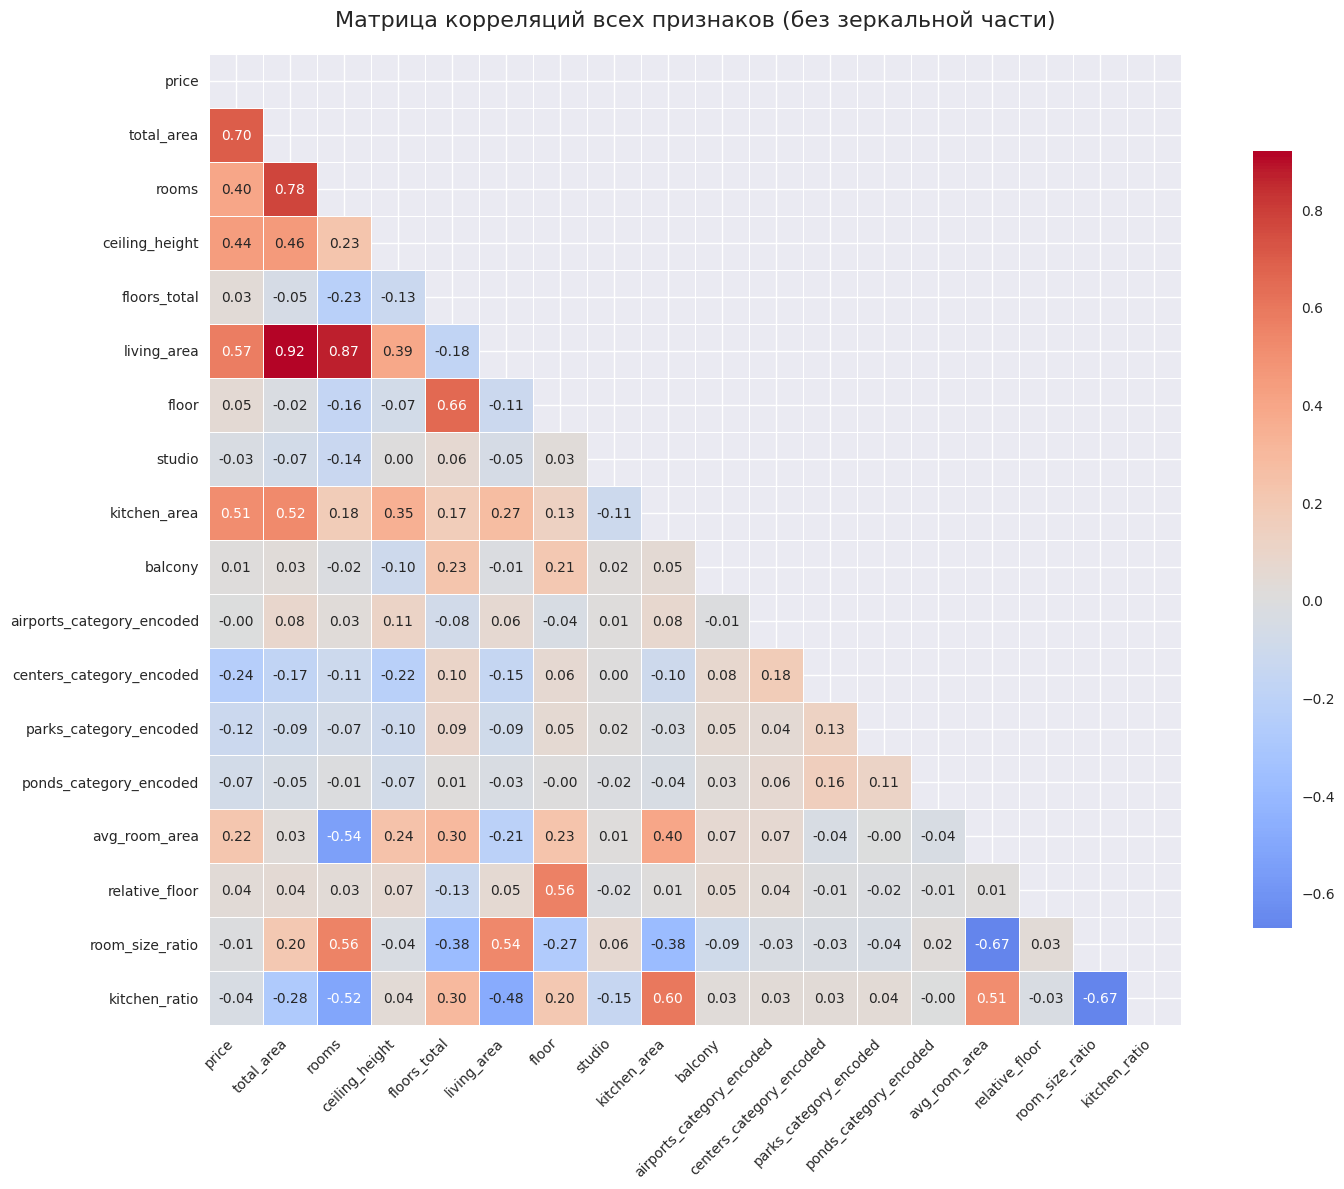

In [340]:
# Создаем матрицу корреляций
correlation_matrix = df_clean.corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Строим heatmap без зеркальной части
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            mask=mask)

plt.title('Матрица корреляций всех признаков (без зеркальной части)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Подготовка данных

In [342]:
# Подготовка данных
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = X.columns.tolist()

## Масштабирование признаков

In [343]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение модели на масштабированных данных

МЕТРИКИ КАЧЕСТВА (Линейная регрессия):
R²: 0.4792
MAE: 1661524.07
MSE: 20280255428391.72
RMSE: 4503360.46


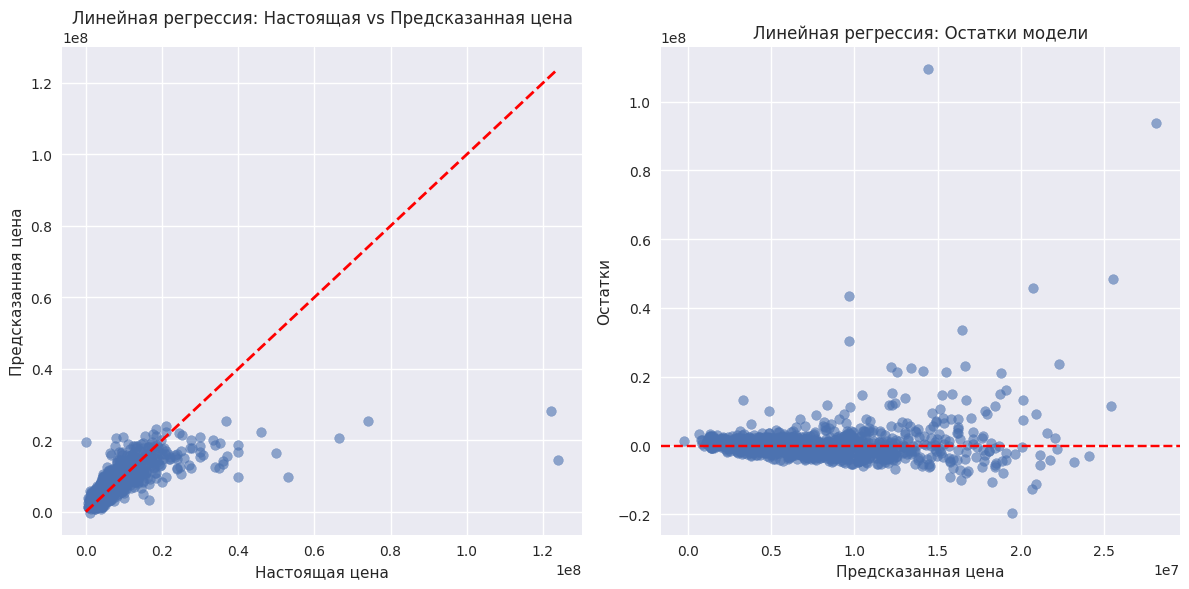


ВАЖНОСТЬ ПРИЗНАКОВ (Линейная регрессия - коэффициенты):
                      feature   coefficient
0                  total_area  3.523965e+07
4                 living_area -1.720451e+07
1                       rooms -1.559739e+07
15            room_size_ratio  9.456335e+06
2              ceiling_height  5.348960e+06
7                kitchen_area  4.362403e+06
13              avg_room_area -2.892174e+06
6                      studio -2.050129e+06
10   centers_category_encoded -1.668582e+06
5                       floor  1.399547e+06
9   airports_category_encoded -8.286344e+05
14             relative_floor -4.964188e+05
11     parks_category_encoded -4.875310e+05
16              kitchen_ratio  4.234887e+05
12     ponds_category_encoded -2.547967e+05
8                     balcony -8.964959e+04
3                floors_total  3.115593e+04


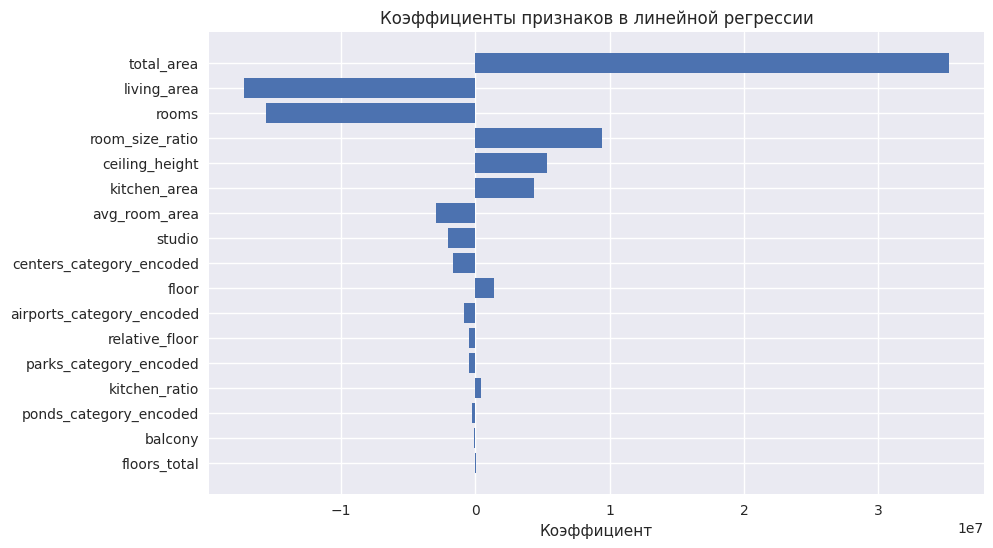

In [344]:
# Обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Метрики
print("МЕТРИКИ КАЧЕСТВА (Линейная регрессия):")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

# График настоящих vs предсказанных цен
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title('Линейная регрессия: Настоящая vs Предсказанная цена')

# График остатков
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('Линейная регрессия: Остатки модели')

plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты) - ИСПРАВЛЕННАЯ ЧАСТЬ
feature_importance_lr = pd.DataFrame({
    'feature': feature_names,  # Используем сохраненные названия
    'coefficient': lr.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nВАЖНОСТЬ ПРИЗНАКОВ (Линейная регрессия - коэффициенты):")
print(feature_importance_lr)

# График коэффициентов
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['feature'], feature_importance_lr['coefficient'])
plt.xlabel('Коэффициент')
plt.title('Коэффициенты признаков в линейной регрессии')
plt.gca().invert_yaxis()
plt.show()

## Посмотрим на полиномиальню регрессию с lasso регуляризацией

ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ С LASSO РЕГУЛЯРИЗАЦИЕЙ

Степень 1:
R²: 0.4792 | MAE: 1661516.70 | RMSE: 4503364.41


/home/pingvin/ML_HomeWork/1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+16, tolerance: 2.035e+13
  model = cd_fast.enet_coordinate_descent(



Степень 2:
R²: 0.5296 | MAE: 1541279.45 | RMSE: 4279980.30


/home/pingvin/ML_HomeWork/1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+16, tolerance: 2.035e+13
  model = cd_fast.enet_coordinate_descent(



Степень 3:
R²: 0.5666 | MAE: 1586463.46 | RMSE: 4108141.74

Лучшая степень: 3 (R²: 0.5666)

МЕТРИКИ КАЧЕСТВА (Полиномиальная регрессия 3 степени + Lasso):
R²: 0.5666
MAE: 1586463.46
MSE: 16876828594291.23
RMSE: 4108141.74


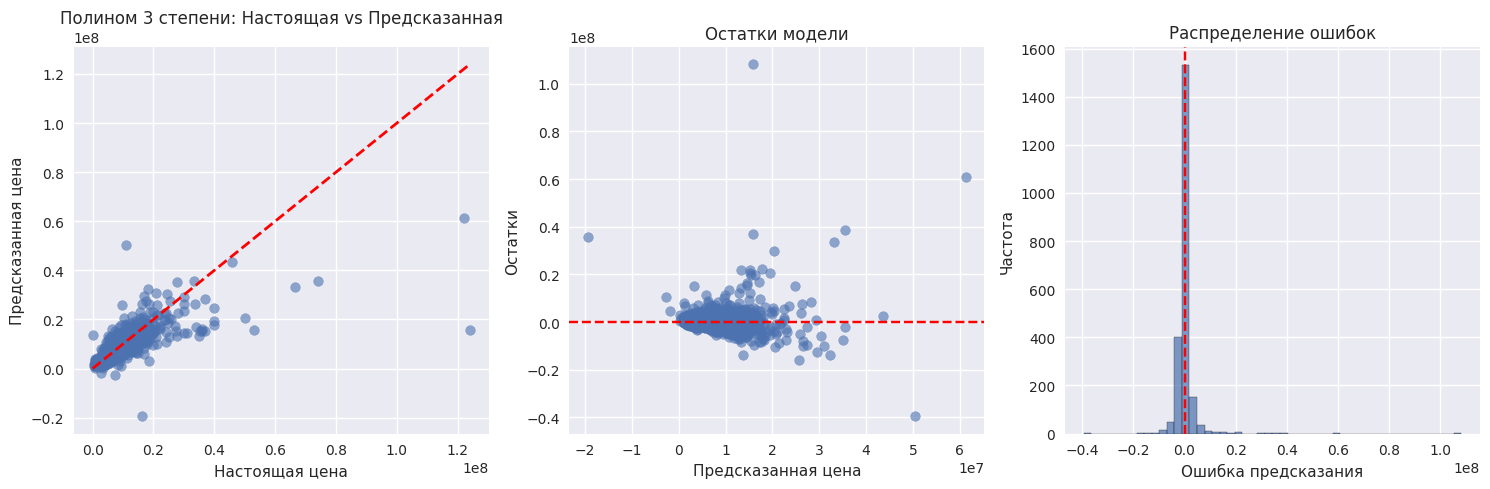


ТОП-15 ВАЖНЫХ ПРИЗНАКОВ (Полином 3 степени + Lasso):
                                                feature   coefficient
964                        kitchen_area avg_room_area^2  2.699424e+08
524                       ceiling_height kitchen_area^2  1.441280e+08
923               kitchen_area^2 parks_category_encoded  1.392006e+08
925                        kitchen_area^2 avg_room_area -1.239724e+08
920                              kitchen_area^2 balcony -1.079264e+08
282           total_area balcony ponds_category_encoded -1.046342e+08
121                          kitchen_area avg_room_area -1.046190e+08
958   kitchen_area parks_category_encoded kitchen_ratio -1.036800e+08
926                       kitchen_area^2 relative_floor -9.821917e+07
924               kitchen_area^2 ponds_category_encoded  9.536180e+07
408           rooms kitchen_area parks_category_encoded -9.417794e+07
203                         total_area ceiling_height^2 -9.225431e+07
130                               ba

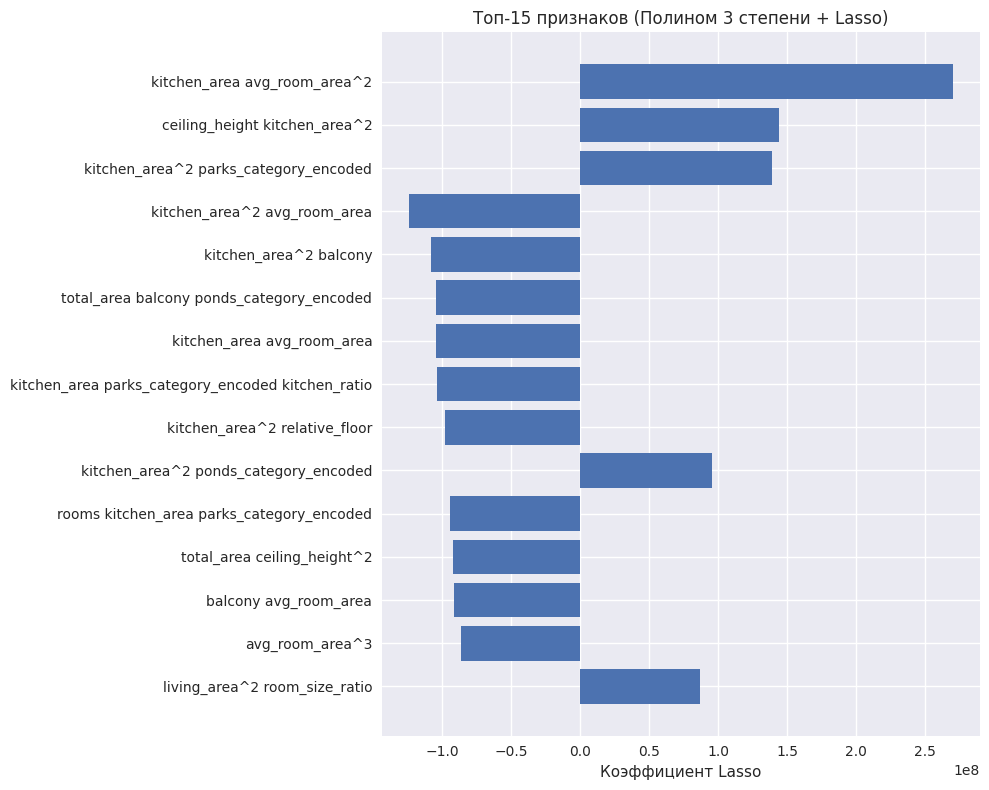

In [345]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


# Полиномиальная регрессия до 3 степени + Lasso
print("ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ С LASSO РЕГУЛЯРИЗАЦИЕЙ")
print("=" * 50)

degrees = [1, 2, 3]
best_degree = 0
best_r2 = -float('inf')
best_model = None

for degree in degrees:
    # Создаем pipeline: полиномиальные признаки -> стандартизация -> Lasso
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', MinMaxScaler()),
        ('lasso', Lasso(alpha=0.8, random_state=42, max_iter=10000))
    ])

    # Обучаем модель
    pipeline.fit(X_train, y_train)
    y_pred_poly = pipeline.predict(X_test)

    # Метрики
    r2 = r2_score(y_test, y_pred_poly)
    mae = mean_absolute_error(y_test, y_pred_poly)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

    print(f"\nСтепень {degree}:")
    print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

    # Сохраняем лучшую модель
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree
        best_model = pipeline

print(f"\nЛучшая степень: {best_degree} (R²: {best_r2:.4f})")

# Предсказания лучшей модели
y_pred_best = best_model.predict(X_test)

# Детальная оценка лучшей модели
print(f"\nМЕТРИКИ КАЧЕСТВА (Полиномиальная регрессия {best_degree} степени + Lasso):")
print(f"R²: {r2_score(y_test, y_pred_best):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")

# Графики для лучшей модели
plt.figure(figsize=(15, 5))

# График 1: Настоящие vs Предсказанные значения
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title(f'Полином {best_degree} степени: Настоящая vs Предсказанная')

# График 2: Остатки
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('Остатки модели')

# График 3: Распределение ошибок
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты Lasso)
lasso_model = best_model.named_steps['lasso']
poly_features = best_model.named_steps['poly'].get_feature_names_out(X.columns)

feature_importance_poly = pd.DataFrame({
    'feature': poly_features,
    'coefficient': lasso_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nТОП-15 ВАЖНЫХ ПРИЗНАКОВ (Полином {best_degree} степени + Lasso):")
print(feature_importance_poly.head(30))

# График важности признаков
plt.figure(figsize=(10, 8))
top_features = feature_importance_poly.head(15)
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel('Коэффициент Lasso')
plt.title(f'Топ-15 признаков (Полином {best_degree} степени + Lasso)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ С RIDGE РЕГУЛЯРИЗАЦИЕЙ


Степень 1, alpha=0.1:
R²: 0.4789 | MAE: 1659893.77 | RMSE: 4504424.77
Степень 1, alpha=1.0:
R²: 0.4764 | MAE: 1658177.52 | RMSE: 4515466.53
Степень 1, alpha=10.0:
R²: 0.4618 | MAE: 1675933.38 | RMSE: 4577962.87
Степень 2, alpha=0.1:
R²: 0.5352 | MAE: 1529574.24 | RMSE: 4254068.79
Степень 2, alpha=1.0:
R²: 0.5292 | MAE: 1527857.45 | RMSE: 4281414.17
Степень 2, alpha=10.0:
R²: 0.5171 | MAE: 1522229.82 | RMSE: 4336432.63
Степень 3, alpha=0.1:
R²: 0.5752 | MAE: 1508325.76 | RMSE: 4067306.43
Степень 3, alpha=1.0:
R²: 0.5630 | MAE: 1466716.25 | RMSE: 4124988.68
Степень 3, alpha=10.0:
R²: 0.5396 | MAE: 1483823.96 | RMSE: 4233986.10

Лучшая модель: степень 3, alpha=0.1 (R²: 0.5752)

МЕТРИКИ КАЧЕСТВА (Полиномиальная регрессия 3 степени + Ridge alpha=0.1):
R²: 0.5752
MAE: 1508325.76
MSE: 16542981586064.05
RMSE: 4067306.43


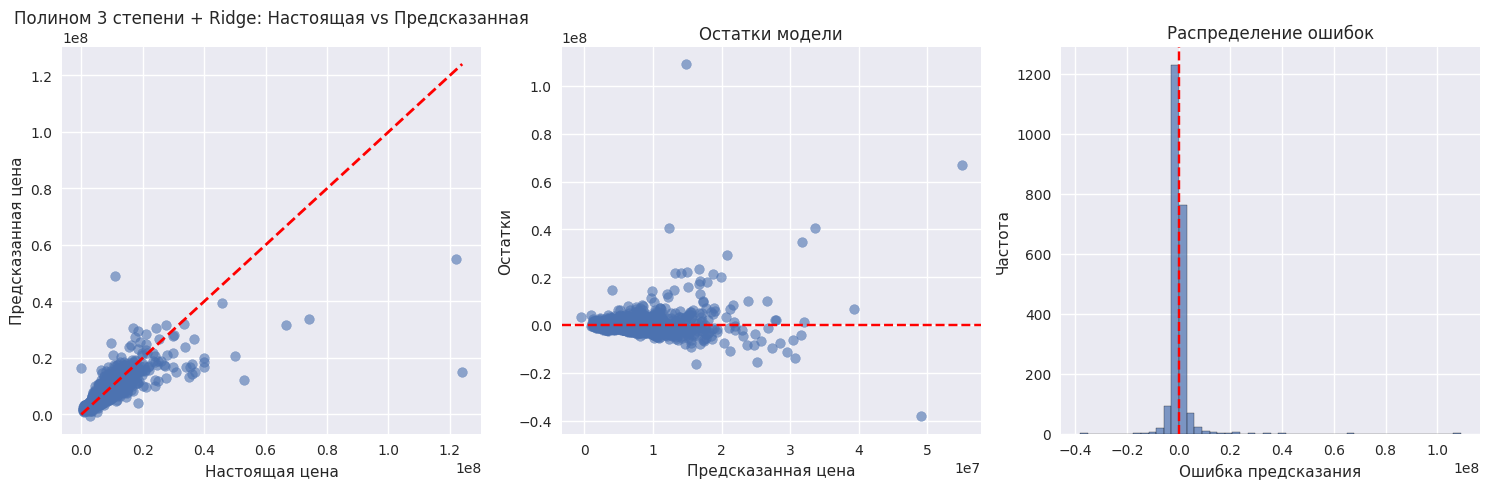


ТОП-15 ВАЖНЫХ ПРИЗНАКОВ (Полином 3 степени + Ridge alpha=0.1):
                                                feature   coefficient
760                living_area ponds_category_encoded^2  2.602700e+07
444                      rooms ponds_category_encoded^2 -2.356185e+07
303   total_area parks_category_encoded ponds_catego... -2.273911e+07
924               kitchen_area^2 ponds_category_encoded  2.127756e+07
439   rooms parks_category_encoded ponds_category_en...  2.045432e+07
218                           total_area floors_total^2 -1.938162e+07
747              living_area centers_category_encoded^2  1.838906e+07
183                          total_area^2 avg_room_area  1.824946e+07
1058           centers_category_encoded^2 avg_room_area  1.743112e+07
923               kitchen_area^2 parks_category_encoded  1.678395e+07
295               total_area centers_category_encoded^2  1.635433e+07
553   ceiling_height centers_category_encoded ponds_... -1.602778e+07
734          living_area b

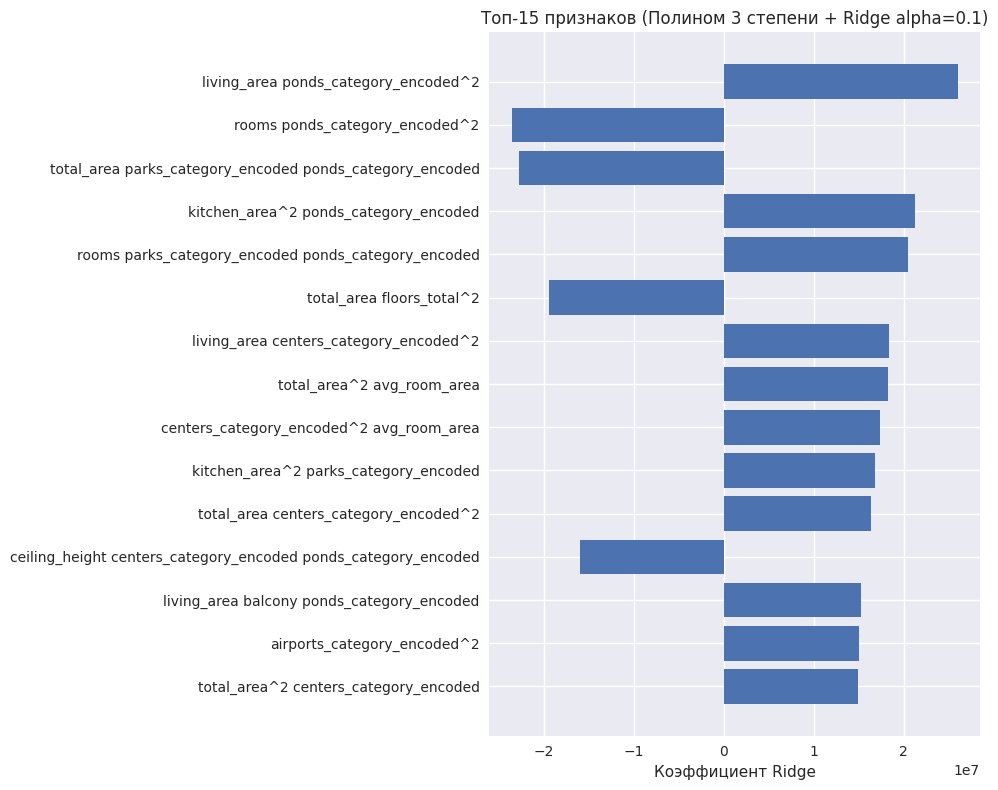


СРАВНЕНИЕ С ОБЫЧНОЙ ЛИНЕЙНОЙ РЕГРЕССИЕЙ
Обычная линейная регрессия:
R²: 0.4792
RMSE: 4503360.46

Полиномиальная Ridge регрессия (степень 3, alpha=0.1):
R²: 0.5752
RMSE: 4067306.43


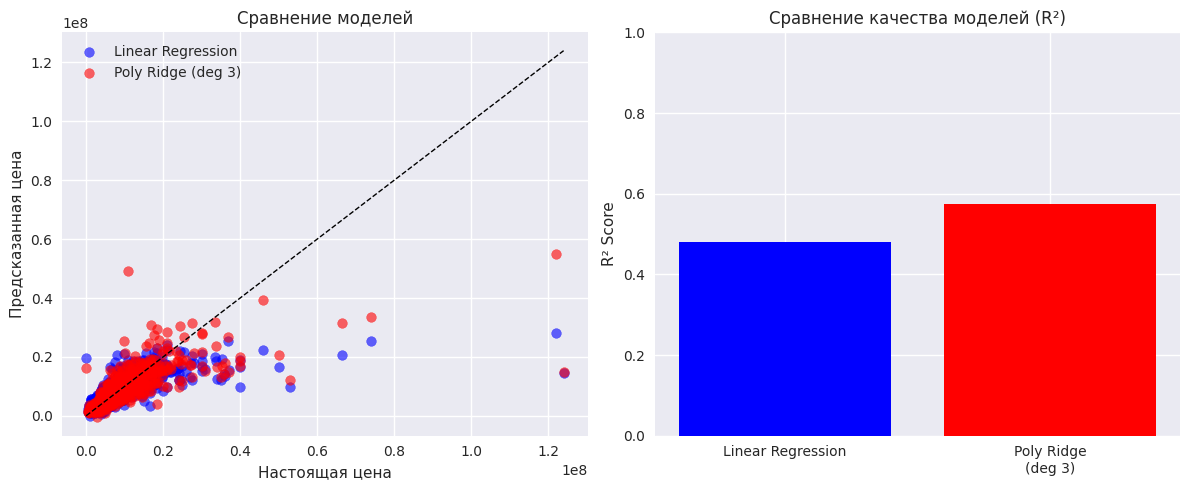

In [346]:
from sklearn.linear_model import Ridge

# Полиномиальная регрессия до 3 степени + Ridge
print("ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ С RIDGE РЕГУЛЯРИЗАЦИЕЙ")
print("=" * 50)

degrees = [1, 2, 3]
alphas = [0.1, 1.0, 10.0]  # Разные значения альфа для Ridge
best_degree = 0
best_alpha = 0
best_r2 = -float('inf')
best_model = None

for degree in degrees:
    for alpha in alphas:
        # Создаем pipeline: полиномиальные признаки -> стандартизация -> Ridge
        pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', MinMaxScaler()),
            ('ridge', Ridge(alpha=alpha, random_state=42, max_iter=10000))
        ])

        # Обучаем модель
        pipeline.fit(X_train, y_train)
        y_pred_poly = pipeline.predict(X_test)

        # Метрики
        r2 = r2_score(y_test, y_pred_poly)
        mae = mean_absolute_error(y_test, y_pred_poly)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

        print(f"Степень {degree}, alpha={alpha}:")
        print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

        # Сохраняем лучшую модель
        if r2 > best_r2:
            best_r2 = r2
            best_degree = degree
            best_alpha = alpha
            best_model = pipeline

print(f"\nЛучшая модель: степень {best_degree}, alpha={best_alpha} (R²: {best_r2:.4f})")

# Предсказания лучшей модели
y_pred_best = best_model.predict(X_test)

# Детальная оценка лучшей модели
print(f"\nМЕТРИКИ КАЧЕСТВА (Полиномиальная регрессия {best_degree} степени + Ridge alpha={best_alpha}):")
print(f"R²: {r2_score(y_test, y_pred_best):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")

# Графики для лучшей модели
plt.figure(figsize=(15, 5))

# График 1: Настоящие vs Предсказанные значения
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title(f'Полином {best_degree} степени + Ridge: Настоящая vs Предсказанная')

# График 2: Остатки
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('Остатки модели')

# График 3: Распределение ошибок
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты Ridge)
ridge_model = best_model.named_steps['ridge']
poly_features = best_model.named_steps['poly'].get_feature_names_out(X.columns)

feature_importance_poly = pd.DataFrame({
    'feature': poly_features,
    'coefficient': ridge_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nТОП-15 ВАЖНЫХ ПРИЗНАКОВ (Полином {best_degree} степени + Ridge alpha={best_alpha}):")
print(feature_importance_poly.head(15))

# График важности признаков
plt.figure(figsize=(10, 8))
top_features = feature_importance_poly.head(15)
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel('Коэффициент Ridge')
plt.title(f'Топ-15 признаков (Полином {best_degree} степени + Ridge alpha={best_alpha})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Сравнение с обычной линейной регрессией
print("\n" + "="*60)
print("СРАВНЕНИЕ С ОБЫЧНОЙ ЛИНЕЙНОЙ РЕГРЕССИЕЙ")
print("="*60)

# Обычная линейная регрессия для сравнения
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Обычная линейная регрессия:")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

print(f"\nПолиномиальная Ridge регрессия (степень {best_degree}, alpha={best_alpha}):")
print(f"R²: {r2_score(y_test, y_pred_best):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")

# Сравнительный график
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_best, alpha=0.6, label=f'Poly Ridge (deg {best_degree})', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title('Сравнение моделей')
plt.legend()

plt.subplot(1, 2, 2)
models = ['Linear Regression', f'Poly Ridge\n(deg {best_degree})']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_best)]
plt.bar(models, r2_scores, color=['blue', 'red'])
plt.ylabel('R² Score')
plt.title('Сравнение качества моделей (R²)')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Выводы
Попробовали предобработку 
- заполнили пропуски
- почистили выбросы
- логически проверили основные закономерности

Обучили несколько моделей посмотрели метрики и выделили ключевые признаки

 - попробовали разные регуляризации
 - сравнили с лучший результат с бейзлайном наглядно
 - Полиномиальная Ridge регрессия (степень 3, alpha=0.1): R²: 0.5752
 - RMSE: 4067306.43

Возможно стоило почистить выбросы по цене что бы модель на них не реагировала